In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
!ls "drive/Shareddrives/CIB Case Study - MT/CIB Dataset"

'Credit Cards Dataset Y1Y2 PARTH#0.csv'
'Credit Cards Dataset Y1Y2 PARTH#1.csv'
'Credit Cards Dataset Y1Y2 PARTH#2.csv'
'Credit Cards Dataset Y1Y2 PARTH#3.csv'
'Credit Cards Dataset Y1Y2 PARTH#4.csv'
'Credit Cards Dataset Y1Y2 PARTH#5.csv'
'Credit Cards Dataset Y1Y2 PARTH#6.csv'
'Credit Cards Dataset Y1Y2 PARTH#7.csv'
'Credit Cards Dataset Y1Y2 PARTH#8.csv'
'Credit Cards Dataset Y1Y2 PARTH#9.csv'
'Hackathon Details'


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [100]:
pd.set_option('display.max_rows', 500)   # modifying the display rows count 
pd.set_option("display.precision", 3)


# Data Loading and Quality Checks 

In this section, we load the data, we combine them into a big data frame. 

In [101]:
# Batch Loadings 
path = "drive/Shareddrives/CIB Case Study - MT/CIB Dataset/"
batch = []
for i in range (0,10):
  batch.append(pd.read_csv(path + f'Credit Cards Dataset Y1Y2 PARTH#{i}.csv'))



In [102]:
# Making Sure that all the batches have the same y shape 
for i in range (0,10):
  print (f"batch {i} is " , batch[i].shape )

batch 0 is  (14999, 446)
batch 1 is  (15000, 446)
batch 2 is  (15000, 446)
batch 3 is  (15000, 446)
batch 4 is  (15000, 446)
batch 5 is  (15000, 446)
batch 6 is  (15000, 446)
batch 7 is  (15000, 446)
batch 8 is  (15000, 446)
batch 9 is  (8977, 446)


In [103]:
# Concatentating all the batches into a single data frame 
credit_data = pd.concat(batch)

In [104]:
credit_data.shape

(143976, 446)

In [105]:
credit_data.reset_index(inplace=True , drop=True)



In [106]:
credit_data.head()

,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,POS_COUNT_Q2_Y2,POS_COUNT_Q3_Y2,POS_COUNT_Q4_Y2,POS_Amount_Q1_Y2,POS_Amount_Q2_Y2,POS_Amount_Q3_Y2,POS_Amount_Q4_Y2,Online_Transaction_COUNT_Q1_Y2,Online_Transaction_COUNT_Q2_Y2,Online_Transaction_COUNT_Q3_Y2,Online_Transaction_COUNT_Q4_Y2,Online_Transaction_Amount_Q1_Y2,Online_Transaction_Amount_Q2_Y2,Online_Transaction_Amount_Q3_Y2,Online_Transaction_Amount_Q4_Y2,NO_OF_Distinct_Currencies_Q1_Y2,NO_OF_Distinct_Currencies_Q2_Y2,NO_OF_Distinct_Currencies_Q3_Y2,NO_OF_Distinct_Currencies_Q4_Y2,Number_of_Local_ATMs_Q1_Y2,Number_of_Local_ATMs_Q2_Y2,Number_of_Local_ATMs_Q3_Y2,Number_of_Local_ATMs_Q4_Y2,Number_of_International_ATMs_Q1_Y2,Number_of_International_ATMs_Q2_Y2,Number_of_International_ATMs_Q3_Y2,Number_of_International_ATMs_Q4_Y2,Number_of_International_Merchants_Q1_Y2,Number_of_International_Merchants_Q2_Y2,Number_of_International_Merchants_Q3_Y2,Number_of_International_Merchants_Q4_Y2,Number_of_Local_Merchants_Q1_Y2,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2,batch_id
0,1,1,MALE,75,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.0,NaN,NaN,NaN,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,PARTH#0
1,2,2,MALE,31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,8800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,PARTH#0
2,3,3,MALE,34,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTH#0
3,4,4,NaN,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,PARTH#0
4,5,5,MALE,49,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,PARTH#0


In [107]:
credit_data.describe()

,CUSTOMER_ID,CARD_ID,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q4_Y1,...,POS_COUNT_Q1_Y2,POS_COUNT_Q2_Y2,POS_COUNT_Q3_Y2,POS_COUNT_Q4_Y2,POS_Amount_Q1_Y2,POS_Amount_Q2_Y2,POS_Amount_Q3_Y2,POS_Amount_Q4_Y2,Online_Transaction_COUNT_Q1_Y2,Online_Transaction_COUNT_Q2_Y2,Online_Transaction_COUNT_Q3_Y2,Online_Transaction_COUNT_Q4_Y2,Online_Transaction_Amount_Q1_Y2,Online_Transaction_Amount_Q2_Y2,Online_Transaction_Amount_Q3_Y2,Online_Transaction_Amount_Q4_Y2,NO_OF_Distinct_Currencies_Q1_Y2,NO_OF_Distinct_Currencies_Q2_Y2,NO_OF_Distinct_Currencies_Q3_Y2,NO_OF_Distinct_Currencies_Q4_Y2,Number_of_Local_ATMs_Q1_Y2,Number_of_Local_ATMs_Q2_Y2,Number_of_Local_ATMs_Q3_Y2,Number_of_Local_ATMs_Q4_Y2,Number_of_International_ATMs_Q1_Y2,Number_of_International_ATMs_Q2_Y2,Number_of_International_ATMs_Q3_Y2,Number_of_International_ATMs_Q4_Y2,Number_of_International_Merchants_Q1_Y2,Number_of_International_Merchants_Q2_Y2,Number_of_International_Merchants_Q3_Y2,Number_of_International_Merchants_Q4_Y2,Number_of_Local_Merchants_Q1_Y2,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2
count,143976.000,143976.000,143976.000,143976.000,2914.000,3917.000,4871.000,4682.000,2.914e+03,3.917e+03,4.871e+03,4.682e+03,4614.000,6993.000,9786.000,7490.000,4.614e+03,6.993e+03,9.786e+03,7.490e+03,17030.000,24646.000,28208.000,28173.000,1.703e+04,2.465e+04,2.821e+04,2.817e+04,1690.000,1890.000,2793.000,2844.000,1.690e+03,1.890e+03,2.793e+03,2844.000,11616.000,16890.000,20971.000,22038.000,...,61339.000,65873.000,72462.000,77692.000,6.134e+04,6.587e+04,7.246e+04,7.769e+04,22273.000,24242.000,28447.000,34439.000,2.227e+04,2.424e+04,2.845e+04,3.444e+04,17454.000,18769.000,21224.000,23154.000,29479.000,30638.000,35365.000,37808.000,1335.000,1343.000,1306.000,1182.000,12296.000,13413.000,14798.000,15333.000,59734.000,63848.000,70415.000,75520.000,22603.000,24751.000,29067.000,35025.000
mean,58329.199,71988.500,41.491,2.569,10.609,10.986,10.195,10.211,3.883e+04,4.919e+04,4.347e+04,4.877e+04,11.840,11.749,11.697,11.469,3.196e+04,3.445e+04,3.775e+04,3.602e+04,20.905,20.854,21.540,18.551,1.835e+04,1.754e+04,1.759e+04,1.958e+04,9.763,8.673,8.987,9.886,3.515e+04,3.733e+04,4.384e+04,36295.935,21.202,20.838,23.463,22.670,...,55.893,58.462,60.856,61.548,5.247e+04,5.688e+04,6.020e+04,6.120e+04,62.157,63.328,61.425,70.712,2.910e+04,3.017e+04,3.125e+04,3.162e+04,1.394,1.402,1.423,1.435,2.140,2.127,2.172,2.201,1.868,2.012,1.930,2.127,5.345,5.291,5.717,5.500,5.600,5.877,6.143,6.006,2.389,2.436,2.555,2.640
std,35472.110,41562.436,12.706,2.382,12.091,14.718,12.682,11.934,6.398e+04,8.946e+04,7.120e+04,7.908e+04,15.486,15.573,14.702,13.805,8.154e+04,7.729e+04,7.452e+04,7.801e+04,28.635,28.322,28.161,27.397,6.447e+04,4.753e+04,4.660e+04,5.130e+04,17.683,

In [108]:
print("Examining null values:\n", credit_data.isnull().sum())

Examining null values:
 CUSTOMER_ID                                                                  0
CARD_ID                                                                      0
GENDER                                                                   17048
AGE                                                                          0
CARD_TENURE                                                                  0
Count_of_Airline_Q1_Y1                                                  141062
Count_of_Airline_Q2_Y1                                                  140059
Count_of_Airline_Q3_Y1                                                  139105
Count_of_Airline_Q4_Y1                                                  139294
Amount_of_Airline_Q1_Y1                                                 141062
Amount_of_Airline_Q2_Y1                                                 140059
Amount_of_Airline_Q3_Y1                                                 139105
Amount_of_Airline_Q4_Y1     

In [109]:
print("Examining data frame data types:\n", credit_data.dtypes)

Examining data frame data types:
 CUSTOMER_ID                                                               int64
CARD_ID                                                                   int64
GENDER                                                                   object
AGE                                                                       int64
CARD_TENURE                                                               int64
Count_of_Airline_Q1_Y1                                                  float64
Count_of_Airline_Q2_Y1                                                  float64
Count_of_Airline_Q3_Y1                                                  float64
Count_of_Airline_Q4_Y1                                                  float64
Amount_of_Airline_Q1_Y1                                                 float64
Amount_of_Airline_Q2_Y1                                                 float64
Amount_of_Airline_Q3_Y1                                                 float64
Amount

In [110]:
len(credit_data['CUSTOMER_ID'].unique())

123252

 >  since the number of unique customer_IDs is less than the number of the records in the dataset, this means that we have customers that have multiple credit cards. we aim to investigate this further in the Descriptive Analytics section. 

In [111]:
len(credit_data['CARD_ID'].unique())

143976

> since the number of unique credit cards is equal to the number of records we have in the dataset, this means that we have no duplicate records.

## Handling Missing Values 

### Categorical Variabels 

After careful examination of the dataset we have, we found that we have two categorical variables ( Gender , batch_id ) where batch_id has no missing_values and have no importance to the analysis. hence, it can be safely dropped. regarding the Gender and in order to maintain the distribution of the data and the quality of the analysis, we decided to create a third category for missing gender "NA" 

In [112]:
# Creating a copy of the data frame for missing values processing 

creditData = credit_data.copy()

In [113]:
creditData.shape

(143976, 446)

The missing values of gender is around 10% of the records we have. hence, we decided not to drop this records in order to perform the analysis.

In [114]:
print ( f"The percentage of missing Gender rows is {creditData['GENDER'].isnull().sum() /creditData.shape[0] * 100} %") 

The percentage of missing Gender rows is 11.840862365949882 %


In [115]:
creditData['GENDER'].fillna('NA' , inplace= True)

In [116]:
creditData['GENDER'].value_counts()

MALE      84958
FEMALE    41970
NA        17048
Name: GENDER, dtype: int64

In [117]:
creditData.drop(['batch_id'] , 1 , inplace = True)

In [118]:
print(creditData.shape)
creditData.head()

(143976, 445)


,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,POS_COUNT_Q1_Y2,POS_COUNT_Q2_Y2,POS_COUNT_Q3_Y2,POS_COUNT_Q4_Y2,POS_Amount_Q1_Y2,POS_Amount_Q2_Y2,POS_Amount_Q3_Y2,POS_Amount_Q4_Y2,Online_Transaction_COUNT_Q1_Y2,Online_Transaction_COUNT_Q2_Y2,Online_Transaction_COUNT_Q3_Y2,Online_Transaction_COUNT_Q4_Y2,Online_Transaction_Amount_Q1_Y2,Online_Transaction_Amount_Q2_Y2,Online_Transaction_Amount_Q3_Y2,Online_Transaction_Amount_Q4_Y2,NO_OF_Distinct_Currencies_Q1_Y2,NO_OF_Distinct_Currencies_Q2_Y2,NO_OF_Distinct_Currencies_Q3_Y2,NO_OF_Distinct_Currencies_Q4_Y2,Number_of_Local_ATMs_Q1_Y2,Number_of_Local_ATMs_Q2_Y2,Number_of_Local_ATMs_Q3_Y2,Number_of_Local_ATMs_Q4_Y2,Number_of_International_ATMs_Q1_Y2,Number_of_International_ATMs_Q2_Y2,Number_of_International_ATMs_Q3_Y2,Number_of_International_ATMs_Q4_Y2,Number_of_International_Merchants_Q1_Y2,Number_of_International_Merchants_Q2_Y2,Number_of_International_Merchants_Q3_Y2,Number_of_International_Merchants_Q4_Y2,Number_of_Local_Merchants_Q1_Y2,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2
0,1,1,MALE,75,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.0,NaN,NaN,NaN,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,2,2,MALE,31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,8800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,3,3,MALE,34,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NA,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,5,MALE,49,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


## Numerical Values 



In this Section, we decided to find some statistics about the missing numerical values. 

In [119]:
# Calculating the % of missing values in each numerical columns
numerical_columns = ['float64' , 'int64']
creditData_numerical = creditData.select_dtypes(include=numerical_columns)

In [120]:
creditData_numerical.shape # we removed rthe 'GENDER' categorical column    

(143976, 444)

In [121]:
numerical_columns_index = creditData_numerical.columns.values

In [122]:
percent_missing = (creditData[numerical_columns_index].isnull().sum() * 100 / len(creditData) ).round(2)
percent_missing_formatted = (creditData[numerical_columns_index].isnull().sum() * 100 / len(creditData) ).round(2).astype(str)+' %'


In [123]:
percent_missing_formatted

CUSTOMER_ID                                                               0.0 %
CARD_ID                                                                   0.0 %
AGE                                                                       0.0 %
CARD_TENURE                                                               0.0 %
Count_of_Airline_Q1_Y1                                                  97.98 %
Count_of_Airline_Q2_Y1                                                  97.28 %
Count_of_Airline_Q3_Y1                                                  96.62 %
Count_of_Airline_Q4_Y1                                                  96.75 %
Amount_of_Airline_Q1_Y1                                                 97.98 %
Amount_of_Airline_Q2_Y1                                                 97.28 %
Amount_of_Airline_Q3_Y1                                                 96.62 %
Amount_of_Airline_Q4_Y1                                                 96.75 %
Count_of_Accomodation_Q1_Y1             

In [124]:
percent_df=percent_missing.to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


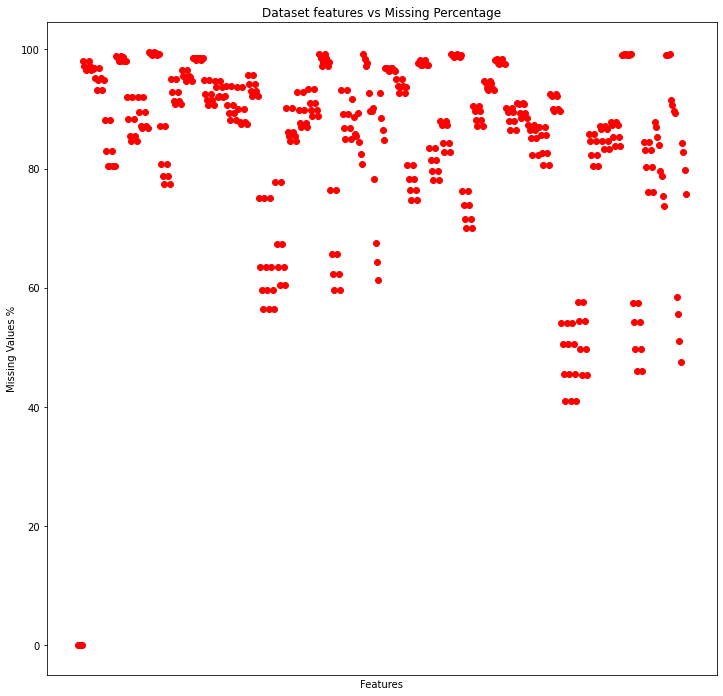

In [125]:

#plt.scatter(percent_missing.columns.values , percent_missing,   figsize=(20,20),  linewidth=5)
plt.figure(figsize=(12, 12))
plt.scatter(percent_df.index.values,percent_df[0] , c='r')

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_ticklabels([])
x_axis.set_ticks([])
plt.title('Dataset features vs Missing Percentage')
plt.ylabel('Missing Values %')
plt.xlabel('Features')
plt.show()
plt.close()

In [126]:
# Display how many numerical columns have more than 50% missing Data 
missing50 = percent_missing[percent_missing >= 50]
print ( f"we have around {round((missing50.shape[0]/len(percent_missing) * 100) , 2)} % of the columns with more than 50 % missing values")

we have around 95.72 % of the columns with more than 50 % missing values


In [127]:
# Display how many numerical columns have more than 75% missing Data 
missing75 = percent_missing[percent_missing >= 75]
print ( f"we have around {round((missing75.shape[0]/len(percent_missing) * 100) , 2)} % of the columns with more than 75 % missing values")

we have around 84.46 % of the columns with more than 75 % missing values


In [128]:
# Display how many numerical columns have more than 90% missing Data 
missing90 = percent_missing[percent_missing >= 90]
print ( f"we have around {round((missing90.shape[0]/len(percent_missing) * 100) , 2)} % of the columns with more than 90 % missing values")

we have around 42.79 % of the columns with more than 90 % missing values


After Careful examination to the numerical columns we have in the dataset, we found the following:
-  **95.72%** of the numerical columns has more than **50 %** missing values  
- **84.46%** of the numerical columns has more than **75 %** missing values  
- **42.79%** of the numerical columns has more than **90 %** missing values  

hence, dropping the columns with most missing values does not seem like a reasonable choice. 

After careful examination of the numerical columns we found that their titles represent either an Amount spent on a quantity or the  count of transactions. hence, Regarding the missing values, we decided to fill them with 0 indication that there was no any amount spent or count of transaction for this record (The Absence of information is a piece of information!). 

In [129]:
creditData.fillna(0 , axis = 1 , inplace=True)

In [130]:
#sanity check that we have no missing values anymore 
print (f"We have: {creditData.isnull().sum().sum()} missing values") 
creditData.isnull().sum()

We have: 0 missing values


CUSTOMER_ID                                                             0
CARD_ID                                                                 0
GENDER                                                                  0
AGE                                                                     0
CARD_TENURE                                                             0
Count_of_Airline_Q1_Y1                                                  0
Count_of_Airline_Q2_Y1                                                  0
Count_of_Airline_Q3_Y1                                                  0
Count_of_Airline_Q4_Y1                                                  0
Amount_of_Airline_Q1_Y1                                                 0
Amount_of_Airline_Q2_Y1                                                 0
Amount_of_Airline_Q3_Y1                                                 0
Amount_of_Airline_Q4_Y1                                                 0
Count_of_Accomodation_Q1_Y1           

## Outliers Detection and handling 

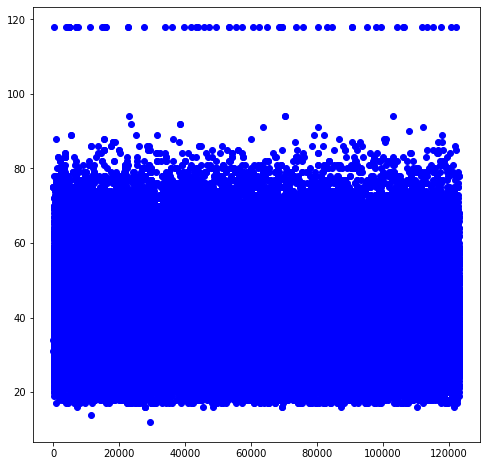

In [131]:
#copy before removing outliers 
creditData_copy = creditData


plt.figure(figsize=(8, 8))
plt.scatter(creditData_copy.CUSTOMER_ID, creditData_copy.AGE, c ="blue")
plt.show()

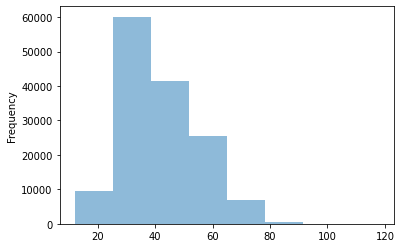

In [132]:
creditData_copy.AGE.plot.hist(bins=8, alpha=0.5)


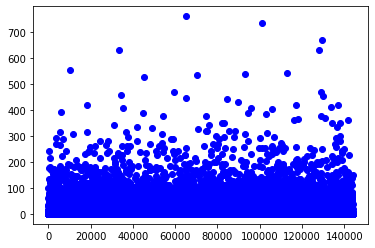

In [133]:
plt.scatter(creditData_copy.CARD_ID, creditData_copy.Local_Cash_Transaction_Count_Q1_Y2, c ="blue")
plt.show()

In [134]:
# Finding the ages greater than 100 
customerAge_100 = creditData_copy.loc[creditData_copy.AGE>100]
print("the Number of Customers with Age greater than 100 is: " , len(customerAge_100))

customerAge_100

the Number of Customers with Age greater than 100 is:  59


,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,POS_COUNT_Q1_Y2,POS_COUNT_Q2_Y2,POS_COUNT_Q3_Y2,POS_COUNT_Q4_Y2,POS_Amount_Q1_Y2,POS_Amount_Q2_Y2,POS_Amount_Q3_Y2,POS_Amount_Q4_Y2,Online_Transaction_COUNT_Q1_Y2,Online_Transaction_COUNT_Q2_Y2,Online_Transaction_COUNT_Q3_Y2,Online_Transaction_COUNT_Q4_Y2,Online_Transaction_Amount_Q1_Y2,Online_Transaction_Amount_Q2_Y2,Online_Transaction_Amount_Q3_Y2,Online_Transaction_Amount_Q4_Y2,NO_OF_Distinct_Currencies_Q1_Y2,NO_OF_Distinct_Currencies_Q2_Y2,NO_OF_Distinct_Currencies_Q3_Y2,NO_OF_Distinct_Currencies_Q4_Y2,Number_of_Local_ATMs_Q1_Y2,Number_of_Local_ATMs_Q2_Y2,Number_of_Local_ATMs_Q3_Y2,Number_of_Local_ATMs_Q4_Y2,Number_of_International_ATMs_Q1_Y2,Number_of_International_ATMs_Q2_Y2,Number_of_International_ATMs_Q3_Y2,Number_of_International_ATMs_Q4_Y2,Number_of_International_Merchants_Q1_Y2,Number_of_International_Merchants_Q2_Y2,Number_of_International_Merchants_Q3_Y2,Number_of_International_Merchants_Q4_Y2,Number_of_Local_Merchants_Q1_Y2,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2
86,87,87,NA,118,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,20.0,0.0,7300.0,0.0,4900.0,0.0,0.0,10.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,30.0,...,60.0,10.0,30.0,0.0,14060.0,2300.0,7220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3810,3806,3811,NA,118,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4624,4617,4625,NA,118,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,74214.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6843,6816,6844,NA,118,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,5.0,0.0,7420.0,0.0,20280.0,5.0,10.0,0.0,20.0,2575.0,2570.0,0.0,28265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,35.0,0.0,11825.0,0.0,17970.0,0.0,55.0,35.0,20.0,60.0,1415.0,1370.0,33720.0,1235.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,3.0,1.0
7592,7555,7593,NA,118,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,130.0,60.0,16210.0,7840.0,31340.0,32850.0,40.0,90.0,40.0,50.0,208710.0,657560.0,278130.0,486490.0,0.0,0.0,20.0,...,1390.0,1190.0,430.0,410.0,77600.0,244830.0,300670.0,71600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,

It is quite suspicious that all the ages greater than 100 are equal to 118. right?

hence, we decided to calculate the z score for the ages. 

In [135]:
from scipy import stats
#calculating the z_scores for the AGE column
z_scores = np.abs(stats.zscore(creditData_copy.AGE))


In [136]:
age_outliers_index =  np.where(z_scores > 3)[0]

In [137]:
creditData_age_outliers= creditData_copy['AGE'].iloc[list(age_outliers_index)]

In [138]:
print(len(age_outliers_index))

396


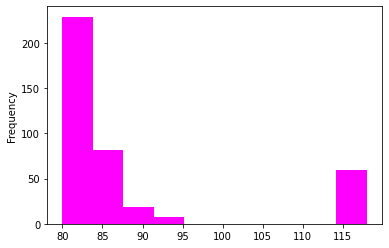

In [139]:
creditData_age_outliers.plot.hist(color='magenta')

> we have a fair and reasonable for ages that were determined as outliers by calculating the z-score. hence, we decided to go for removing the ages that are greater than 100 due to the following reasons:

- All the ages greater than 100 years old are equal to 118 years old which is kind of suspicious. 
- All the customers with ages greater than 100 years old have no gender specified except for 2 customers.
- The count of the customers greater than 100 years old is only 59 customers. 

In [140]:
# finding the indices for the age outliers 
customerAge_100_index = customerAge_100.index.values

In [141]:
customerAge_100_index

array([    86,   3810,   4624,   6843,   7592,  11148,  14852,  15914,
        16237,  23289,  25353,  28181,  34940,  37338,  41273,  43586,
        45313,  45945,  47955,  49675,  51801,  56188,  56575,  58824,
        61179,  64790,  67096,  69855,  74176,  74511,  75224,  75314,
        80185,  83034,  83103,  88294,  90911,  90959,  91551,  93490,
        96902, 101134, 106902, 107430, 110666, 112685, 114950, 118970,
       121180, 121367, 121557, 127642, 128584, 130690, 131128, 133172,
       136237, 140383, 142544])

In [142]:
creditData_final = creditData_copy.drop(list(customerAge_100_index) , 0)

In [143]:
creditData_final.shape

(143917, 445)

In [144]:
creditData_final.reset_index(drop=True , inplace=True)

In [145]:
print(creditData_final.shape)
creditData_final.tail()

(143917, 445)


,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,POS_COUNT_Q1_Y2,POS_COUNT_Q2_Y2,POS_COUNT_Q3_Y2,POS_COUNT_Q4_Y2,POS_Amount_Q1_Y2,POS_Amount_Q2_Y2,POS_Amount_Q3_Y2,POS_Amount_Q4_Y2,Online_Transaction_COUNT_Q1_Y2,Online_Transaction_COUNT_Q2_Y2,Online_Transaction_COUNT_Q3_Y2,Online_Transaction_COUNT_Q4_Y2,Online_Transaction_Amount_Q1_Y2,Online_Transaction_Amount_Q2_Y2,Online_Transaction_Amount_Q3_Y2,Online_Transaction_Amount_Q4_Y2,NO_OF_Distinct_Currencies_Q1_Y2,NO_OF_Distinct_Currencies_Q2_Y2,NO_OF_Distinct_Currencies_Q3_Y2,NO_OF_Distinct_Currencies_Q4_Y2,Number_of_Local_ATMs_Q1_Y2,Number_of_Local_ATMs_Q2_Y2,Number_of_Local_ATMs_Q3_Y2,Number_of_Local_ATMs_Q4_Y2,Number_of_International_ATMs_Q1_Y2,Number_of_International_ATMs_Q2_Y2,Number_of_International_ATMs_Q3_Y2,Number_of_International_ATMs_Q4_Y2,Number_of_International_Merchants_Q1_Y2,Number_of_International_Merchants_Q2_Y2,Number_of_International_Merchants_Q3_Y2,Number_of_International_Merchants_Q4_Y2,Number_of_Local_Merchants_Q1_Y2,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2
143912,71056,143972,FEMALE,32,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,63.0,63.0,0.0,0.0,102795.0,48594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0
143913,90497,143973,FEMALE,33,8,0.0,2.0,0.0,0.0,0.0,3610.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,254.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,4.0,9.0,9.0,0.0,2622.0,3568.0,2426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0
143914,87573,143974,FEMALE,54,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,16320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,36.0,48.0,30.0,17892.0,17676.0,34512.0,13248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0
143915,123252,143975,FEMALE,44,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143916,96262,143976,MALE,30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,0.0,0.0,0.0,51996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Feature Engineering 

In order to measure the profitability of the customers, we decided to create  new features in order to help us with the analysis such as:

-  ( Total_Transactions_Amount_Y1 , Total_Transactions_Amount_Y2 , Total_Transactions_Amount ) : the total amount spent by a single credit card in Y1 and Y2 and the two years sum as well. 
-  ( Total_Transactions_Count_Y1 , Total_Transactions_Count_Y1 , Total_Transactions_Count ) : the number of transactions done by a single card in Y1 and Y2 and the two years count as well. 
- ( NO_OF_Distinct_Months_Y1 , NO_OF_Distinct_Months_Y1 , NO_OF_Distinct_Months_Y2  ) : the total number of distinct active months for a specific card in a year and their sum as well. 
- Transaction value score  : we defined this measure as being the ( Total_Transactions_Amount / Total_Transactions_count ) and will be normalized. 
- Total_merchant_X_score_Y1 : for each merchant X of the 16 merchants, we will add a feature to represent the total in year 1 by a single card
- Total_merchant_X_score_Y2 : for each merchant X of the 16 merchants, we will add a feature to represent the total in year 2 by a single card
- Total_merchant_X_score : for each merchant X of the 16 merchants, we will add a feature to represent the total spent to this merchant over the two years by a single card.
- Activity Score : for each card, it is measure as **(Total Retail Transactions count * (Number of Active months in two years / 24 ) + Total Cash Transcations Count )** in order to be a measure of activity of the card, then it will be normalized. 
- Total_online_transactions: two new features were added for the total amount and count for online transactions. 
- Total_POS_transaction: two new features were added for the total amount and count for online transactions. 

In [146]:
Y1_amount_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A' or col[0] == 'T' or col[0] == 'P' or col[0] == 'O') and (col[-1] == '1') and 'count' not in col.lower())]

In [147]:
Y2_amount_columns =  [ col for col in creditData_final.columns.values if ((col[0] == 'A' or col[0] == 'T' or col[0] == 'P' or col[0] == 'O') and (col[-1] == '2') and 'count' not in col.lower())]

In [148]:
#Y2_amount_columns

In [149]:
len(Y2_amount_columns)

80

In [150]:
Y1_count_columns =  [ col for col in creditData_final.columns.values if (('count' in col.lower() ) and (col[-1] == '1') and (col[0] != 'I') and (col[0] != 'L'))] # to remove local and international transactions since they are already included in the Total transactions count 

In [151]:
len(Y1_count_columns)

80

In [152]:
Y2_count_columns = [ col for col in creditData_final.columns.values if (('count' in col.lower() ) and (col[-1] == '2') and (col[0] != 'I') and (col[0] != 'L'))]

In [153]:
len(Y2_count_columns)

80

### Column sum validation 

In [154]:
Y1_Q1_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q1_Y1") and 'count' not in col.lower())]
Y1_Q2_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q2_Y1") and 'count' not in col.lower())]
Y1_Q3_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q3_Y1") and 'count' not in col.lower())]
Y1_Q4_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q4_Y1") and 'count' not in col.lower())]
Y2_Q1_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q1_Y2") and 'count' not in col.lower())]
Y2_Q2_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q2_Y2") and 'count' not in col.lower())]
Y2_Q3_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q3_Y2") and 'count' not in col.lower())]
Y2_Q4_merchant_columns = [ col for col in creditData_final.columns.values if ((col[0] == 'A') and (col[-5:] == "Q4_Y2") and 'count' not in col.lower())]



In [155]:
merchant_amount_sum_Y1 = np.sum([creditData_final[Y1_Q1_merchant_columns] , creditData_final[Y1_Q2_merchant_columns] , creditData_final[Y1_Q3_merchant_columns]  , creditData_final[Y1_Q4_merchant_columns] ] , axis = 0 )
merchant_amount_sum_Y2 = np.sum([creditData_final[Y2_Q1_merchant_columns] , creditData_final[Y2_Q2_merchant_columns] , creditData_final[Y2_Q3_merchant_columns]  , creditData_final[Y2_Q4_merchant_columns] ] , axis = 0 )
merchant_amount_total = np.sum([merchant_amount_sum_Y1 , merchant_amount_sum_Y2], axis=0)

In [156]:
Y1_Q1_merchant_columns_c = [ col for col in creditData_final.columns.values if ((col[0] == 'C')  and (col[-5:] == "Q1_Y1"))]

In [157]:
res = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Count_Q1_Y1 == creditData_final[Y1_Q1_merchant_columns_c].sum(axis=1))) if not val] #indices of false "total count != sum of merchants counts"
len(res)

74

In [158]:
Y1_Q1_Merchants_total=creditData_final[Y1_Q1_merchant_columns].sum(axis=1)
Y1_Q2_Merchants_total=creditData_final[Y1_Q2_merchant_columns].sum(axis=1)
Y1_Q3_Merchants_total=creditData_final[Y1_Q3_merchant_columns].sum(axis=1)
Y1_Q4_Merchants_total=creditData_final[Y1_Q4_merchant_columns].sum(axis=1)
Y2_Q1_Merchants_total=creditData_final[Y2_Q1_merchant_columns].sum(axis=1)
Y2_Q2_Merchants_total=creditData_final[Y2_Q2_merchant_columns].sum(axis=1)
Y2_Q3_Merchants_total=creditData_final[Y2_Q3_merchant_columns].sum(axis=1)
Y2_Q4_Merchants_total=creditData_final[Y2_Q4_merchant_columns].sum(axis=1)

res0 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q1_Y1 == Y1_Q1_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res1 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q2_Y1 == Y1_Q2_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res2 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q3_Y1 == Y1_Q3_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res3 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q4_Y1 == Y1_Q4_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res4 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q1_Y2 == Y2_Q1_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res5 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q2_Y2 == Y2_Q2_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res6 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q3_Y2 == Y2_Q3_Merchants_total)) if not val] #indices of false "total != sum of merchants"
res7 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Amount_Q4_Y2 == Y2_Q4_Merchants_total)) if not val] #indices of false "total != sum of merchants"


In [159]:
print(len(res0),len(res1),len(res2),len(res3),len(res4),len(res5),len(res6),len(res7))

74 122 146 133 109 144 164 157


In [160]:
res00 = [i for i, val in enumerate((creditData_final.Total_Retail_Transaction_Count_Q1_Y1 == creditData_final[Y1_Q1_merchant_columns_c].sum(axis=1))&(creditData_final.Total_Retail_Transaction_Count_Q1_Y1>0)) if val and i>0] #indices of true "total count == sum of merchants counts" and >0
len(res00)

35765

In [161]:
[i for i in (creditData_final.Total_Retail_Transaction_Amount_Q1_Y1 - Y1_Q1_Merchants_total) if i>0] #differences in amounts

[925.0,
 2456.0,
 12042.0,
 1120.0,
 2070.0,
 672.0,
 1992.0,
 250.0,
 7160.0,
 200.0,
 345.0,
 4844.0,
 3180.0,
 184.0,
 675.0,
 208.0,
 700.0,
 3190.0,
 1300.0,
 5792.0,
 147.0,
 385.0,
 5670.0,
 5895.0,
 3780.0,
 15132.0,
 1800.0,
 268.0,
 1000.0,
 2520.0,
 180.0,
 840.0,
 1680.0,
 1155.0,
 11851.0,
 2628.0,
 4365.0,
 840.0,
 5440.0,
 5805.0,
 7215.0,
 5616.0,
 3010.0,
 2070.0,
 21210.0,
 405.0,
 5064.0,
 402.0,
 850.0,
 7515.0,
 22820.0,
 2940.0,
 1875.0,
 1505.0,
 4365.0,
 788.0,
 4300.0,
 1700.0,
 2732.0,
 14880.0,
 1890.0,
 6630.0,
 900.0,
 9000.0,
 4700.0,
 3275.0,
 41896.0,
 665.0,
 5047.0,
 5160.0,
 3190.0,
 2460.0,
 37710.0,
 1980.0]

In [162]:
#checking total retail transactions = sum of POS and Online transactions

print((creditData_final.Total_Retail_Transaction_Amount_Q1_Y1 == (creditData_final.POS_Amount_Q1_Y1+ creditData_final.Online_Transaction_Amount_Q1_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q2_Y1 == (creditData_final.POS_Amount_Q2_Y1+ creditData_final.Online_Transaction_Amount_Q2_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q3_Y1 == (creditData_final.POS_Amount_Q3_Y1+ creditData_final.Online_Transaction_Amount_Q3_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q4_Y1 == (creditData_final.POS_Amount_Q4_Y1+ creditData_final.Online_Transaction_Amount_Q4_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q1_Y2 == (creditData_final.POS_Amount_Q1_Y2+ creditData_final.Online_Transaction_Amount_Q1_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q2_Y2 == (creditData_final.POS_Amount_Q2_Y2+ creditData_final.Online_Transaction_Amount_Q2_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q3_Y2 == (creditData_final.POS_Amount_Q3_Y2+ creditData_final.Online_Transaction_Amount_Q3_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q4_Y2 == (creditData_final.POS_Amount_Q4_Y2+ creditData_final.Online_Transaction_Amount_Q4_Y2)).all())

True
True
True
True
True
True
True
True


In [163]:
#checking total retail transactions = Local + international

print((creditData_final.Total_Retail_Transaction_Amount_Q1_Y1 == (creditData_final.International_Retail_Transaction_Amount_Q1_Y1+ creditData_final.Local_Retail_Transaction_Amount_Q1_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q2_Y1 == (creditData_final.International_Retail_Transaction_Amount_Q2_Y1+ creditData_final.Local_Retail_Transaction_Amount_Q2_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q3_Y1 == (creditData_final.International_Retail_Transaction_Amount_Q3_Y1+ creditData_final.Local_Retail_Transaction_Amount_Q3_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q4_Y1 == (creditData_final.International_Retail_Transaction_Amount_Q4_Y1+ creditData_final.Local_Retail_Transaction_Amount_Q4_Y1)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q1_Y2 == (creditData_final.International_Retail_Transaction_Amount_Q1_Y2+ creditData_final.Local_Retail_Transaction_Amount_Q1_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q2_Y2 == (creditData_final.International_Retail_Transaction_Amount_Q2_Y2+ creditData_final.Local_Retail_Transaction_Amount_Q2_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q3_Y2 == (creditData_final.International_Retail_Transaction_Amount_Q3_Y2+ creditData_final.Local_Retail_Transaction_Amount_Q3_Y2)).all())
print((creditData_final.Total_Retail_Transaction_Amount_Q4_Y2 == (creditData_final.International_Retail_Transaction_Amount_Q4_Y2+ creditData_final.Local_Retail_Transaction_Amount_Q4_Y2)).all())

True
True
True
True
True
True
True
True


In [164]:
#checking total cash transactions = Local cash + international cash

print((creditData_final.Total_Cash_Transaction_Amount_Q1_Y1 == (creditData_final.International_Cash_Transaction_Amount_Q1_Y1+ creditData_final.Local_Cash_Transaction_Amount_Q1_Y1)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q2_Y1 == (creditData_final.International_Cash_Transaction_Amount_Q2_Y1+ creditData_final.Local_Cash_Transaction_Amount_Q2_Y1)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q3_Y1 == (creditData_final.International_Cash_Transaction_Amount_Q3_Y1+ creditData_final.Local_Cash_Transaction_Amount_Q3_Y1)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q4_Y1 == (creditData_final.International_Cash_Transaction_Amount_Q4_Y1+ creditData_final.Local_Cash_Transaction_Amount_Q4_Y1)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q1_Y2 == (creditData_final.International_Cash_Transaction_Amount_Q1_Y2+ creditData_final.Local_Cash_Transaction_Amount_Q1_Y2)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q2_Y2 == (creditData_final.International_Cash_Transaction_Amount_Q2_Y2+ creditData_final.Local_Cash_Transaction_Amount_Q2_Y2)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q3_Y2 == (creditData_final.International_Cash_Transaction_Amount_Q3_Y2+ creditData_final.Local_Cash_Transaction_Amount_Q3_Y2)).all())
print((creditData_final.Total_Cash_Transaction_Amount_Q4_Y2 == (creditData_final.International_Cash_Transaction_Amount_Q4_Y2+ creditData_final.Local_Cash_Transaction_Amount_Q4_Y2)).all())

True
True
True
True
True
True
True
True


Total_Retail_Transaction_Amount = sum of all groups transactions amounts? -> total is always greater than or equal - 35765 are equal (and>0) and only 74 cases not equal in the case of Q1Y1 - probably there are some transactions that are hidden/not reported


 = POS_Amount + Online_Transaction_Amount ? True

 = Retail_Transaction_Amount_Locally + Retail_Transaction_Amount_Internationally ? True


---


Total_Retail_Transaction_Count = sum of all groups transactions counts ? No, same case as amounts

 = POS_Count + Online_Transaction_Count ?

 = Retail_Transaction_count_Locally + Retail_Transaction_count_Internationally ?


---


 Total_Cash_Transaction_Amount = Cash_Transaction_Amount_Locally + Cash_Transaction_Amount_Internationally ? true



---


 Total_Cash_Transaction_count = Cash_Transaction_count_Locally + Cash_Transaction_count_Internationally ?



### Adding new features

In [165]:
creditData_final['Total_Retail_Transactions_Amount_Y1'] = creditData_final.Total_Retail_Transaction_Amount_Q1_Y1 + creditData_final.Total_Retail_Transaction_Amount_Q2_Y1 + creditData_final.Total_Retail_Transaction_Amount_Q3_Y1 +creditData_final.Total_Retail_Transaction_Amount_Q4_Y1
creditData_final['Total_Retail_Transactions_Amount_Y2'] = creditData_final.Total_Retail_Transaction_Amount_Q1_Y2 + creditData_final.Total_Retail_Transaction_Amount_Q2_Y2 + creditData_final.Total_Retail_Transaction_Amount_Q3_Y2 +creditData_final.Total_Retail_Transaction_Amount_Q4_Y2
creditData_final['Total_Retail_Transactions_Amount'] = creditData_final[['Total_Retail_Transactions_Amount_Y1', 'Total_Retail_Transactions_Amount_Y2']].sum(axis=1)

creditData_final['Total_Cash_Transactions_Amount_Y1'] = creditData_final.Total_Cash_Transaction_Amount_Q1_Y1 + creditData_final.Total_Cash_Transaction_Amount_Q2_Y1 + creditData_final.Total_Cash_Transaction_Amount_Q3_Y1 +creditData_final.Total_Cash_Transaction_Amount_Q4_Y1
creditData_final['Total_Cash_Transactions_Amount_Y2'] = creditData_final.Total_Cash_Transaction_Amount_Q1_Y2 + creditData_final.Total_Cash_Transaction_Amount_Q2_Y2 + creditData_final.Total_Cash_Transaction_Amount_Q3_Y2 +creditData_final.Total_Cash_Transaction_Amount_Q4_Y2
creditData_final['Total_Cash_Transactions_Amount'] = creditData_final[['Total_Cash_Transactions_Amount_Y1', 'Total_Cash_Transactions_Amount_Y2']].sum(axis=1)

creditData_final['Total_Transactions_Amount_Y1'] = creditData_final[['Total_Retail_Transactions_Amount_Y1', 'Total_Cash_Transactions_Amount_Y1']].sum(axis=1)
creditData_final['Total_Transactions_Amount_Y2'] = creditData_final[['Total_Retail_Transactions_Amount_Y2', 'Total_Cash_Transactions_Amount_Y2']].sum(axis=1)
creditData_final['Total_Transactions_Amount'] = creditData_final[['Total_Transactions_Amount_Y1', 'Total_Transactions_Amount_Y2']].sum(axis=1)


In [166]:
creditData_final['Total_Retail_Transactions_Count_Y1'] = creditData_final.Total_Retail_Transaction_Count_Q1_Y1 + creditData_final.Total_Retail_Transaction_Count_Q2_Y1 + creditData_final.Total_Retail_Transaction_Count_Q3_Y1 +creditData_final.Total_Retail_Transaction_Count_Q4_Y1
creditData_final['Total_Retail_Transactions_Count_Y2'] = creditData_final.Total_Retail_Transaction_Count_Q1_Y2 + creditData_final.Total_Retail_Transaction_Count_Q2_Y2 + creditData_final.Total_Retail_Transaction_Count_Q3_Y2 +creditData_final.Total_Retail_Transaction_Count_Q4_Y2
creditData_final['Total_Retail_Transactions_Count'] = creditData_final[['Total_Retail_Transactions_Count_Y1', 'Total_Retail_Transactions_Count_Y2']].sum(axis=1)

creditData_final['Total_Cash_Transactions_Count_Y1'] = creditData_final.Total_Cash_Transaction_Count_Q1_Y1 + creditData_final.Total_Cash_Transaction_Count_Q2_Y1 + creditData_final.Total_Cash_Transaction_Count_Q3_Y1 +creditData_final.Total_Cash_Transaction_Count_Q4_Y1
creditData_final['Total_Cash_Transactions_Count_Y2'] = creditData_final.Total_Cash_Transaction_Count_Q1_Y2 + creditData_final.Total_Cash_Transaction_Count_Q2_Y2 + creditData_final.Total_Cash_Transaction_Count_Q3_Y2 +creditData_final.Total_Cash_Transaction_Count_Q4_Y2
creditData_final['Total_Cash_Transactions_Count'] = creditData_final[['Total_Cash_Transactions_Count_Y1', 'Total_Cash_Transactions_Count_Y2']].sum(axis=1)

creditData_final['Total_Transactions_Count_Y1'] = creditData_final[['Total_Retail_Transactions_Count_Y1', 'Total_Cash_Transactions_Count_Y1']].sum(axis=1)
creditData_final['Total_Transactions_Count_Y2'] = creditData_final[['Total_Retail_Transactions_Count_Y2', 'Total_Cash_Transactions_Count_Y2']].sum(axis=1)
creditData_final['Total_Transactions_Count'] = creditData_final[['Total_Transactions_Count_Y1', 'Total_Transactions_Count_Y2']].sum(axis=1)


In [167]:
creditData_final['NO_OF_Distinct_Months_Y1'] = creditData_final.NO_OF_Distinct_Months_Q1_Y1 + creditData_final.NO_OF_Distinct_Months_Q2_Y1 + creditData_final.NO_OF_Distinct_Months_Q3_Y1 +creditData_final.NO_OF_Distinct_Months_Q4_Y1
creditData_final['NO_OF_Distinct_Months_Y2'] = creditData_final.NO_OF_Distinct_Months_Q1_Y2 + creditData_final.NO_OF_Distinct_Months_Q2_Y2 + creditData_final.NO_OF_Distinct_Months_Q3_Y2 +creditData_final.NO_OF_Distinct_Months_Q4_Y2
creditData_final['NO_OF_Distinct_Months'] = creditData_final[['NO_OF_Distinct_Months_Y1', 'NO_OF_Distinct_Months_Y2']].sum(axis=1)


In [168]:
creditData_final['Total_Online_Transaction_Amount_Y1'] = creditData_final.Online_Transaction_Amount_Q1_Y1 + creditData_final.Online_Transaction_Amount_Q2_Y1 + creditData_final.Online_Transaction_Amount_Q3_Y1 +creditData_final.Online_Transaction_Amount_Q4_Y1
creditData_final['Total_Online_Transaction_Amount_Y2'] = creditData_final.Online_Transaction_Amount_Q1_Y2 + creditData_final.Online_Transaction_Amount_Q2_Y2 + creditData_final.Online_Transaction_Amount_Q3_Y2 +creditData_final.Online_Transaction_Amount_Q4_Y2
creditData_final['Total_Online_Transaction_Amount'] = creditData_final[['Total_Online_Transaction_Amount_Y1', 'Total_Online_Transaction_Amount_Y2']].sum(axis=1)

creditData_final['Total_Online_Transaction_Count_Y1'] = creditData_final.Online_Transaction_COUNT_Q1_Y1 + creditData_final.Online_Transaction_COUNT_Q2_Y1 + creditData_final.Online_Transaction_COUNT_Q3_Y1 +creditData_final.Online_Transaction_COUNT_Q4_Y1
creditData_final['Total_Online_Transaction_Count_Y2'] = creditData_final.Online_Transaction_COUNT_Q1_Y2 + creditData_final.Online_Transaction_COUNT_Q2_Y2 + creditData_final.Online_Transaction_COUNT_Q3_Y2 +creditData_final.Online_Transaction_COUNT_Q4_Y2
creditData_final['Total_Online_Transaction_Count'] = creditData_final[['Total_Online_Transaction_Count_Y1', 'Total_Online_Transaction_Count_Y2']].sum(axis=1)


In [169]:
creditData_final['Total_POS_Amount_Y1'] = creditData_final.POS_Amount_Q1_Y1 + creditData_final.POS_Amount_Q2_Y1 + creditData_final.POS_Amount_Q3_Y1 +creditData_final.POS_Amount_Q4_Y1
creditData_final['Total_POS_Amount_Y2'] = creditData_final.POS_Amount_Q1_Y2 + creditData_final.POS_Amount_Q2_Y2 + creditData_final.POS_Amount_Q3_Y2 +creditData_final.POS_Amount_Q4_Y2
creditData_final['Total_POS_Amount'] = creditData_final[['Total_POS_Amount_Y1', 'Total_POS_Amount_Y2']].sum(axis=1)

creditData_final['Total_POS_Count_Y1'] = creditData_final.POS_COUNT_Q1_Y1 + creditData_final.POS_COUNT_Q2_Y1 + creditData_final.POS_COUNT_Q3_Y1 +creditData_final.POS_COUNT_Q4_Y1
creditData_final['Total_POS_Count_Y2'] = creditData_final.POS_COUNT_Q1_Y2 + creditData_final.POS_COUNT_Q2_Y2 + creditData_final.POS_COUNT_Q3_Y2 +creditData_final.POS_COUNT_Q4_Y2
creditData_final['Total_POS_Count'] = creditData_final[['Total_POS_Count_Y1', 'Total_POS_Count_Y2']].sum(axis=1)

We are aware that some transactional scores are -ve . this is due to having the value of some amounts being -ve due to the possibility of receiving money instead of paying. after normalizing the transaction_value_score column, this values will be represented as well from ranges from [0,1]. Moreover, receiving money indicates that the customer is less profitable as well. 

In [170]:
creditData_final.head()

,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2,Total_Retail_Transactions_Amount_Y1,Total_Retail_Transactions_Amount_Y2,Total_Retail_Transactions_Amount,Total_Cash_Transactions_Amount_Y1,Total_Cash_Transactions_Amount_Y2,Total_Cash_Transactions_Amount,Total_Transactions_Amount_Y1,Total_Transactions_Amount_Y2,Total_Transactions_Amount,Total_Retail_Transactions_Count_Y1,Total_Retail_Transactions_Count_Y2,Total_Retail_Transactions_Count,Total_Cash_Transactions_Count_Y1,Total_Cash_Transactions_Count_Y2,Total_Cash_Transactions_Count,Total_Transactions_Count_Y1,Total_Transactions_Count_Y2,Total_Transactions_Count,NO_OF_Distinct_Months_Y1,NO_OF_Distinct_Months_Y2,NO_OF_Distinct_Months,Total_Online_Transaction_Amount_Y1,Total_Online_Transaction_Amount_Y2,Total_Online_Transaction_Amount,Total_Online_Transaction_Count_Y1,Total_Online_Transaction_Count_Y2,Total_Online_Transaction_Count,Total_POS_Amount_Y1,Total_POS_Amount_Y2,Total_POS_Amount,Total_POS_Count_Y1,Total_POS_Count_Y2,Total_POS_Count
0,1,1,MALE,75,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1392.0,8248.0,9640.0,0.0,3200.0,3200.0,1392.0,11448.0,12840.0,16.0,40.0,56.0,0.0,8.0,8.0,16.0,48.0,64.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1392.0,8248.0,9640.0,16.0,40.0,56.0
1,2,2,MALE,31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,8.0,8.0
2,3,3,MALE,34,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45000.0,45000.0,0.0,45000.0,45000.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,NA,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2434.0,2434.0,0.0,50.0,50.0,0.0,2484.0,2484.0,0.0,1.0,1.0,0.0,4.0,4.0,0.0,5.0,5.0,0.0,1.0,1.0,0.0,2434.0,2434.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,MALE,49,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5745.0,5745.0,0.0,1000.0,1000.0,0.0,6745.0,6745.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5745.0,5745

In [171]:
creditData_final[creditData_final['CARD_ID'] == 3]['Total_Cash_Transactions_Count']


2    9.0
Name: Total_Cash_Transactions_Count, dtype: float64

In [172]:
creditData_final.head(10)

,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,Number_of_Local_Merchants_Q2_Y2,Number_of_Local_Merchants_Q3_Y2,Number_of_Local_Merchants_Q4_Y2,Number_of_Online_Merchants_Q1_Y2,Number_of_Online_Merchants_Q2_Y2,Number_of_Online_Merchants_Q3_Y2,Number_of_Online_Merchants_Q4_Y2,Total_Retail_Transactions_Amount_Y1,Total_Retail_Transactions_Amount_Y2,Total_Retail_Transactions_Amount,Total_Cash_Transactions_Amount_Y1,Total_Cash_Transactions_Amount_Y2,Total_Cash_Transactions_Amount,Total_Transactions_Amount_Y1,Total_Transactions_Amount_Y2,Total_Transactions_Amount,Total_Retail_Transactions_Count_Y1,Total_Retail_Transactions_Count_Y2,Total_Retail_Transactions_Count,Total_Cash_Transactions_Count_Y1,Total_Cash_Transactions_Count_Y2,Total_Cash_Transactions_Count,Total_Transactions_Count_Y1,Total_Transactions_Count_Y2,Total_Transactions_Count,NO_OF_Distinct_Months_Y1,NO_OF_Distinct_Months_Y2,NO_OF_Distinct_Months,Total_Online_Transaction_Amount_Y1,Total_Online_Transaction_Amount_Y2,Total_Online_Transaction_Amount,Total_Online_Transaction_Count_Y1,Total_Online_Transaction_Count_Y2,Total_Online_Transaction_Count,Total_POS_Amount_Y1,Total_POS_Amount_Y2,Total_POS_Amount,Total_POS_Count_Y1,Total_POS_Count_Y2,Total_POS_Count
0,1,1,MALE,75,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1392.0,8248.0,9640.0,0.0,3200.0,3200.0,1392.0,11448.0,12840.0,16.0,40.0,56.0,0.0,8.0,8.0,16.0,48.0,64.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1392.0,8248.0,9640.0,16.0,40.0,56.0
1,2,2,MALE,31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,8800.0,0.0,8.0,8.0
2,3,3,MALE,34,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45000.0,45000.0,0.0,45000.0,45000.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,NA,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2434.0,2434.0,0.0,50.0,50.0,0.0,2484.0,2484.0,0.0,1.0,1.0,0.0,4.0,4.0,0.0,5.0,5.0,0.0,1.0,1.0,0.0,2434.0,2434.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,MALE,49,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5745.0,5745.0,0.0,1000.0,1000.0,0.0,6745.0,6745.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5745.0,5745

In [173]:
# Adding the merchant columns 

merchant_column_index = ['Amount_of_Airline',
 'Amount_of_Accomodation',
 'Amount_of_Clothing_and_Apparel',
 'Amount_of_Education',
 'Amount_of_FoodStoresRestaurants_and_Beverages',
 'Amount_of_GeneralRetail_and_Trade',
 'Amount_of_GovernmentLegal_and_SocialServices_and_Organizations',
 'Amount_of_GroceryStoresSupermarkets',
 'Amount_of_Healthcare',
 'Amount_of_HomeConstruction_and_Furnishing',
 'Amount_of_Jewelery',
 'Amount_of_Professional_and_CommercialServices',
 'Amount_of_Sports_and_Leisure',
 'Amount_of_TelecomServices',
 'Amount_of_Transport',
 'Amount_of_Electronics']

In [174]:
# Adding Merchants_Y1_sum columns 
creditData_final_copy = creditData_final.copy()
creditData_final_copy = pd.concat([creditData_final_copy , pd.DataFrame(merchant_amount_sum_Y1)] , axis=1)
temp_list = list(creditData_final_copy.columns.values)
temp_list = temp_list[:-16] + [col+'_Y1' for col in merchant_column_index]
creditData_final_copy.columns=temp_list


In [175]:
# Adding Merchants_Y2_sum columns 
creditData_final_copy = pd.concat([creditData_final_copy , pd.DataFrame(merchant_amount_sum_Y2)] , axis=1)
temp_list = list(creditData_final_copy.columns.values)
temp_list = temp_list[:-16] + [col+'_Y2' for col in merchant_column_index]
creditData_final_copy.columns=temp_list


In [176]:
# Adding Merchants_Total columns 
creditData_final_copy = pd.concat([creditData_final_copy , pd.DataFrame(merchant_amount_total)] , axis=1)
temp_list = list(creditData_final_copy.columns.values)
temp_list = temp_list[:-16] + ['Total_'+col for col in merchant_column_index]
creditData_final_copy.columns=temp_list

In [177]:
creditData_final = creditData_final_copy
creditData_final.head()

,CUSTOMER_ID,CARD_ID,GENDER,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,...,Amount_of_Healthcare_Y1,Amount_of_HomeConstruction_and_Furnishing_Y1,Amount_of_Jewelery_Y1,Amount_of_Professional_and_CommercialServices_Y1,Amount_of_Sports_and_Leisure_Y1,Amount_of_TelecomServices_Y1,Amount_of_Transport_Y1,Amount_of_Electronics_Y1,Amount_of_Airline_Y2,Amount_of_Accomodation_Y2,Amount_of_Clothing_and_Apparel_Y2,Amount_of_Education_Y2,Amount_of_FoodStoresRestaurants_and_Beverages_Y2,Amount_of_GeneralRetail_and_Trade_Y2,Amount_of_GovernmentLegal_and_SocialServices_and_Organizations_Y2,Amount_of_GroceryStoresSupermarkets_Y2,Amount_of_Healthcare_Y2,Amount_of_HomeConstruction_and_Furnishing_Y2,Amount_of_Jewelery_Y2,Amount_of_Professional_and_CommercialServices_Y2,Amount_of_Sports_and_Leisure_Y2,Amount_of_TelecomServices_Y2,Amount_of_Transport_Y2,Amount_of_Electronics_Y2,Total_Amount_of_Airline,Total_Amount_of_Accomodation,Total_Amount_of_Clothing_and_Apparel,Total_Amount_of_Education,Total_Amount_of_FoodStoresRestaurants_and_Beverages,Total_Amount_of_GeneralRetail_and_Trade,Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations,Total_Amount_of_GroceryStoresSupermarkets,Total_Amount_of_Healthcare,Total_Amount_of_HomeConstruction_and_Furnishing,Total_Amount_of_Jewelery,Total_Amount_of_Professional_and_CommercialServices,Total_Amount_of_Sports_and_Leisure,Total_Amount_of_TelecomServices,Total_Amount_of_Transport,Total_Amount_of_Electronics
0,1,1,MALE,75,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9640.0,0.0,0.0
1,2,2,MALE,31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,0.0,0.0
2,3,3,MALE,34,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,NA,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,MALE,49,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [178]:
creditData_final['Transaction_value_score'] = creditData_final['Total_Transactions_Amount'] / creditData_final['Total_Transactions_Count'] 
creditData_final['Transaction_value_score'].fillna(0 , inplace=True)  #replace NaNs with 0 to indicate 0 transaction score 
creditData_final['Transaction_value_score_normalized'] =   (creditData_final['Transaction_value_score'] - creditData_final['Transaction_value_score'].min()) /  (creditData_final['Transaction_value_score'].max() - creditData_final['Transaction_value_score'].min()) #using max-min normalization

In [179]:
creditData_final['Transaction_value_score'].describe()

count    143917.000
mean       1037.562
std        2408.370
min         -54.550
25%         173.750
50%         485.071
75%        1125.158
max      400000.000
Name: Transaction_value_score, dtype: float64

In [180]:
creditData_final['Transaction_value_score_normalized'].describe()

count    1.439e+05
mean     2.730e-03
std      6.020e-03
min      0.000e+00
25%      5.707e-04
50%      1.349e-03
75%      2.949e-03
max      1.000e+00
Name: Transaction_value_score_normalized, dtype: float64

In [181]:
creditData_final['Activity_Score'] = creditData_final['Total_Retail_Transactions_Count'] * (creditData_final['NO_OF_Distinct_Months'] / 24 ) + creditData_final['Total_Cash_Transactions_Count']
creditData_final['Activity_Score_Normalized'] = (creditData_final['Activity_Score'] - creditData_final['Activity_Score'].min()) /  (creditData_final['Activity_Score'].max() - creditData_final['Activity_Score'].min()) #using max-min normalization

In [182]:
creditData_final['Activity_Score_Normalized'].describe()

count    1.439e+05
mean     1.383e-02
std      3.468e-02
min      0.000e+00
25%      1.243e-04
50%      2.237e-03
75%      1.168e-02
max      1.000e+00
Name: Activity_Score_Normalized, dtype: float64

In [183]:
creditData_final['Activity_Score_Normalized'].value_counts()

0.000e+00    19865
2.072e-05     1265
1.554e-05     1151
1.036e-05     1101
2.331e-05      910
             ...  
5.586e-02        1
3.718e-02        1
1.571e-02        1
1.552e-02        1
3.414e-02        1
Name: Activity_Score_Normalized, Length: 15790, dtype: int64

# Descriptive Analytics 


## Analysis by Merchant Group

### Age Analysis 

In [184]:
bins= [10,20,30,40,50,60,70,80,90,100]
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
creditData_final['AgeGroup'] = pd.cut(creditData_final['AGE'], bins=bins, labels=labels, right=False)
print (creditData_final)

        CUSTOMER_ID  CARD_ID  ... Activity_Score_Normalized  AgeGroup
0                 1        1  ...                 9.323e-04     70-79
1                 2        2  ...                 2.072e-05     30-39
2                 3        3  ...                 5.594e-04     30-39
3                 4        4  ...                 2.512e-04     20-29
4                 5        5  ...                 3.237e-04     40-49
...             ...      ...  ...                       ...       ...
143912        71056   143972  ...                 3.372e-03     30-39
143913        90497   143973  ...                 1.145e-03     30-39
143914        87573   143974  ...                 6.091e-03     50-59
143915       123252   143975  ...                 0.000e+00     40-49
143916        96262   143976  ...                 1.813e-04     30-39

[143917 rows x 531 columns]


In [185]:
#Frequency of every Age Group in the data
(creditData_final['AgeGroup'].value_counts()/len(creditData_final.index) *100).round(1).astype(str)+' %'

30-39    33.0 %
40-49    22.4 %
20-29    17.8 %
50-59    16.5 %
60-69     7.7 %
70-79     2.0 %
10-19     0.5 %
80-89     0.2 %
90-99     0.0 %
Name: AgeGroup, dtype: object

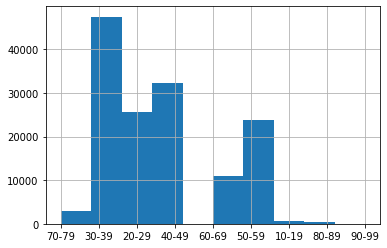

In [186]:
creditData_final['AgeGroup'].hist()

 - Age groups vs online/POS 

In [187]:
merchants = [w[10:] for w in merchant_column_index]


In [188]:
ageGroupData = creditData_final.groupby('AgeGroup').agg('sum')

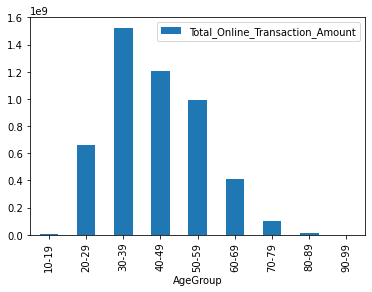

In [189]:
ageGroupData.plot(y="Total_Online_Transaction_Amount",kind='bar')

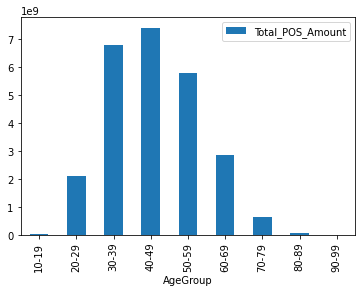

In [190]:
ageGroupData.plot(y="Total_POS_Amount",kind='bar')

Total_Amount_of_Airline
Total_Amount_of_Accomodation
Total_Amount_of_Clothing_and_Apparel
Total_Amount_of_Education
Total_Amount_of_FoodStoresRestaurants_and_Beverages
Total_Amount_of_GeneralRetail_and_Trade
Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations
Total_Amount_of_GroceryStoresSupermarkets
Total_Amount_of_Healthcare
Total_Amount_of_HomeConstruction_and_Furnishing
Total_Amount_of_Jewelery
Total_Amount_of_Professional_and_CommercialServices
Total_Amount_of_Sports_and_Leisure
Total_Amount_of_TelecomServices
Total_Amount_of_Transport
Total_Amount_of_Electronics


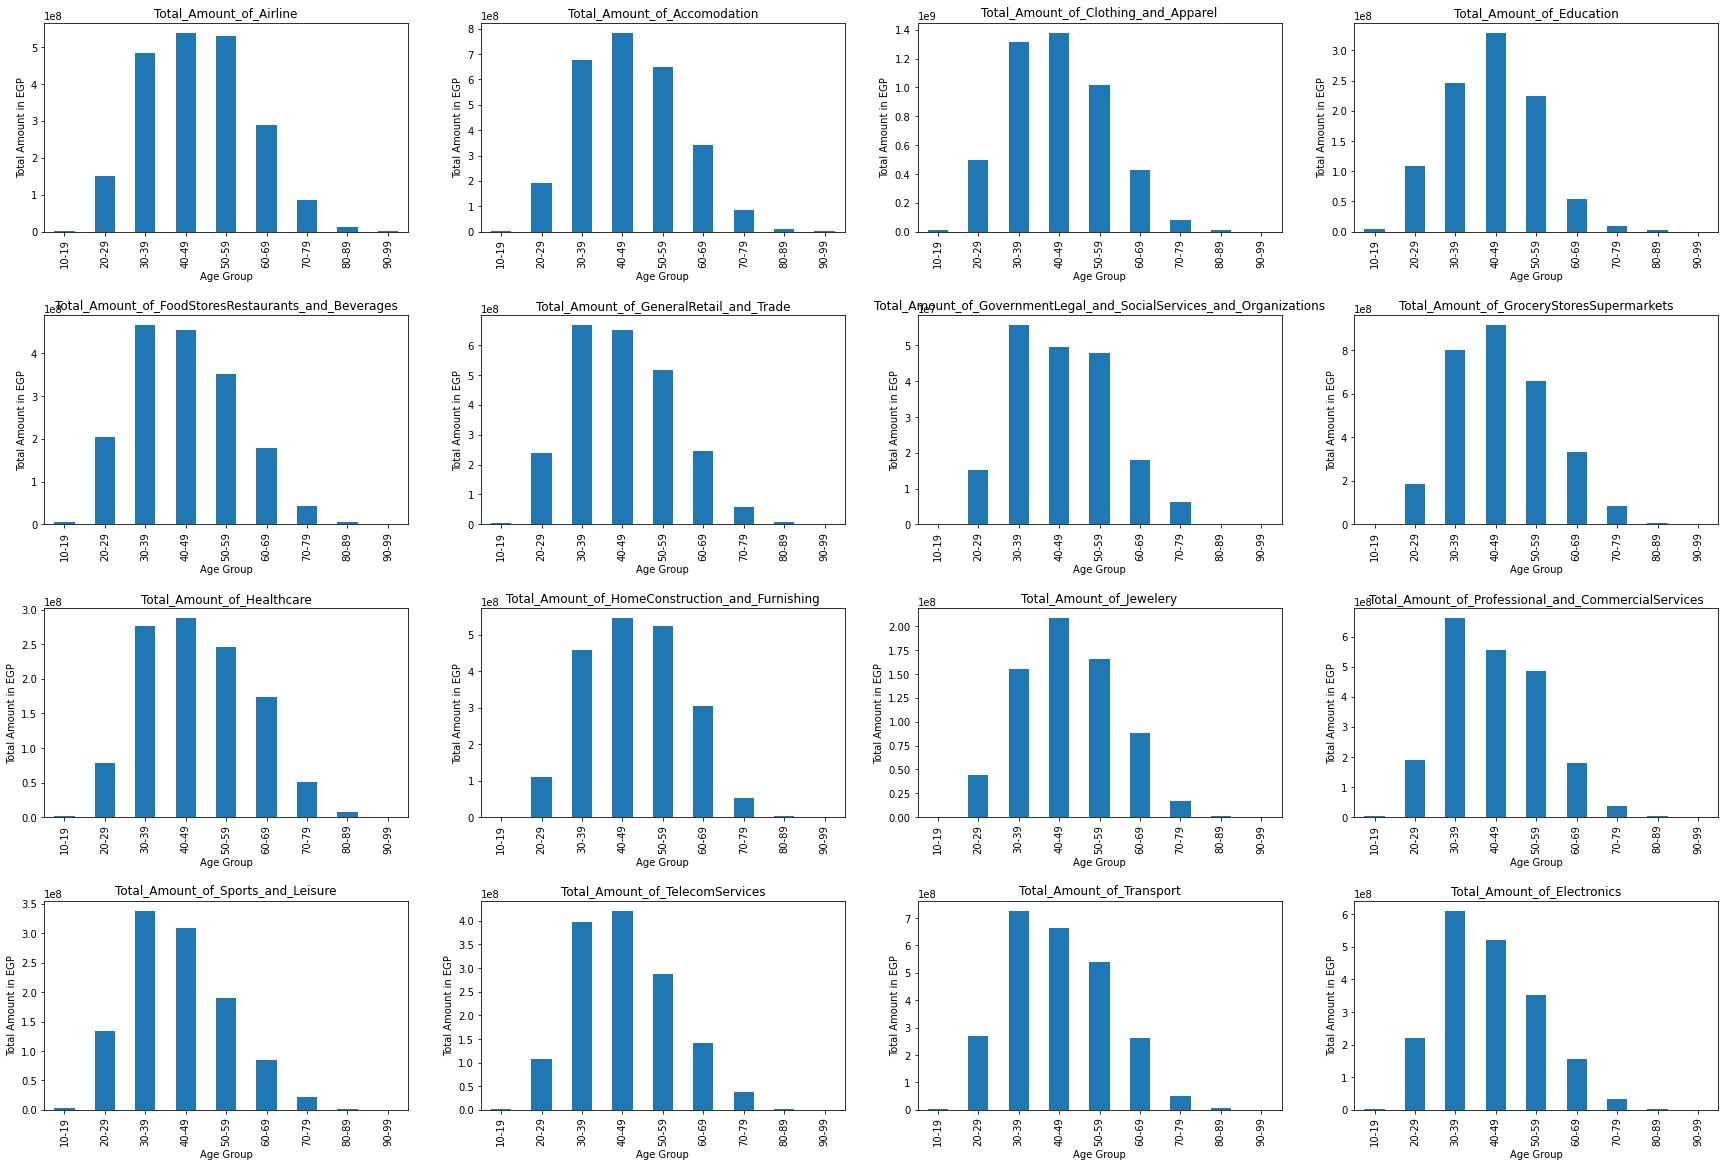

In [191]:
fig,ax = plt.subplots(4,4,figsize=(30,20))
plt.subplots_adjust( wspace=0.2, hspace=0.4)
ax.flatten()
k=0
for i in range(0,4):
  for j in range(0,4):
    category='Total_Amount_of_'+merchants[(i * 4) + j]
    print(category)
    ageGroupData[category].plot(kind='bar',ax=ax[i][j],title=category,ylabel="Total Amount in EGP",xlabel="Age Group")

In [192]:
ageData = creditData_final.groupby('AGE').agg('sum')

In [193]:
ageData.head()

,CUSTOMER_ID,CARD_ID,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q4_Y1,Amount_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,...,Amount_of_Sports_and_Leisure_Y1,Amount_of_TelecomServices_Y1,Amount_of_Transport_Y1,Amount_of_Electronics_Y1,Amount_of_Airline_Y2,Amount_of_Accomodation_Y2,Amount_of_Clothing_and_Apparel_Y2,Amount_of_Education_Y2,Amount_of_FoodStoresRestaurants_and_Beverages_Y2,Amount_of_GeneralRetail_and_Trade_Y2,Amount_of_GovernmentLegal_and_SocialServices_and_Organizations_Y2,Amount_of_GroceryStoresSupermarkets_Y2,Amount_of_Healthcare_Y2,Amount_of_HomeConstruction_and_Furnishing_Y2,Amount_of_Jewelery_Y2,Amount_of_Professional_and_CommercialServices_Y2,Amount_of_Sports_and_Leisure_Y2,Amount_of_TelecomServices_Y2,Amount_of_Transport_Y2,Amount_of_Electronics_Y2,Total_Amount_of_Airline,Total_Amount_of_Accomodation,Total_Amount_of_Clothing_and_Apparel,Total_Amount_of_Education,Total_Amount_of_FoodStoresRestaurants_and_Beverages,Total_Amount_of_GeneralRetail_and_Trade,Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations,Total_Amount_of_GroceryStoresSupermarkets,Total_Amount_of_Healthcare,Total_Amount_of_HomeConstruction_and_Furnishing,Total_Amount_of_Jewelery,Total_Amount_of_Professional_and_CommercialServices,Total_Amount_of_Sports_and_Leisure,Total_Amount_of_TelecomServices,Total_Amount_of_Transport,Total_Amount_of_Electronics,Transaction_value_score,Transaction_value_score_normalized,Activity_Score,Activity_Score_Normalized
AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,29282,30200,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,6592.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,25304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,...,1920.0,0.0,16872.0,0.0,0.0,11984.0,2.574e+04,0.000e+00,1.935e+04,7.800e+03,0.0,8.512e+03,1536.0,0.0,0.0,0.0,1.600e+03,0.0,12576.0,0.0,0.0,18576.0,5.104e+04,0.000e+00,2.196e+04,2.324e+04,0.0,8.512e+03,1536.0,0.0,0.0,0.0,3.520e+03,0.0,29448.0,0.0,138.937,4.837e-04,568.000,3.530e-02
14,11317,11435,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2260.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.0,0.000e+00,0.0,0.0,0.0,0.0,0.000e+00,0.0,0.0,0.0,0.0,2260.0,0.000e+00,0.000e+00,3.400e+02,0.000e+00,0.0,0.000e+00,0.0,0.0,0.0,0.0,0.000e+00,0.0,0.0,0.0,650.000,1.761e-03,0.333,2.072e-05
16,642646,860794,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,5184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,333351.0,5.379e+04,3.647e+04,1.848e+04,2.807e+05,0.0,7.813e+04,0.0,0.0,0.0,0.0,4.190e+04,0.0,3618.0,0.0,0.0,338535.0,5.379e+04,3.647e+04,1.848e+04,2.807e+05,0.0,7.813e+04,0.0,0.0,0.0,0.0,4.190e+04,0.0,3618.0,0.0,5790.074,1.597e-02,74.125,4.607e-03
17,6632730,7464584,59,0.0,0.0,2.0,0.0

In [194]:
# Investigating the spending on each merchant by the age groups 

AirLine_Age = ageData.sort_values(by='Total_Amount_of_Airline' , ascending=False)
Accomodation_Age = ageData.sort_values(by='Total_Amount_of_Accomodation' , ascending=False)
Clothing_Age = ageData.sort_values(by='Total_Amount_of_Clothing_and_Apparel' , ascending=False)
Education_Age = ageData.sort_values(by='Total_Amount_of_Education' , ascending=False)
Food_Age = ageData.sort_values(by='Total_Amount_of_FoodStoresRestaurants_and_Beverages' , ascending=False)
Retail_Age = ageData.sort_values(by='Total_Amount_of_GeneralRetail_and_Trade' , ascending=False)
Governmental_Age = ageData.sort_values(by='Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations' , ascending=False)
Grocery_Age = ageData.sort_values(by='Total_Amount_of_GroceryStoresSupermarkets' , ascending=False)
HealthCare_Age = ageData.sort_values(by='Total_Amount_of_Healthcare' , ascending=False)
HomeConstruction_Age = ageData.sort_values(by='Total_Amount_of_HomeConstruction_and_Furnishing' , ascending=False)
Jewelery_Age = ageData.sort_values(by='Total_Amount_of_Jewelery' , ascending=False)
Professional_Age = ageData.sort_values(by='Total_Amount_of_Professional_and_CommercialServices' , ascending=False)
Sports_Age = ageData.sort_values(by='Total_Amount_of_Sports_and_Leisure' , ascending=False)
Telecom_Age = ageData.sort_values(by='Total_Amount_of_TelecomServices' , ascending=False)
Transport_Age = ageData.sort_values(by='Total_Amount_of_Transport' , ascending=False)
Electronics_Age = ageData.sort_values(by='Total_Amount_of_Electronics' , ascending=False)




Text(0.5, 1.0, 'Top 15 Ages vs Total_Amount_of_Electronics ')

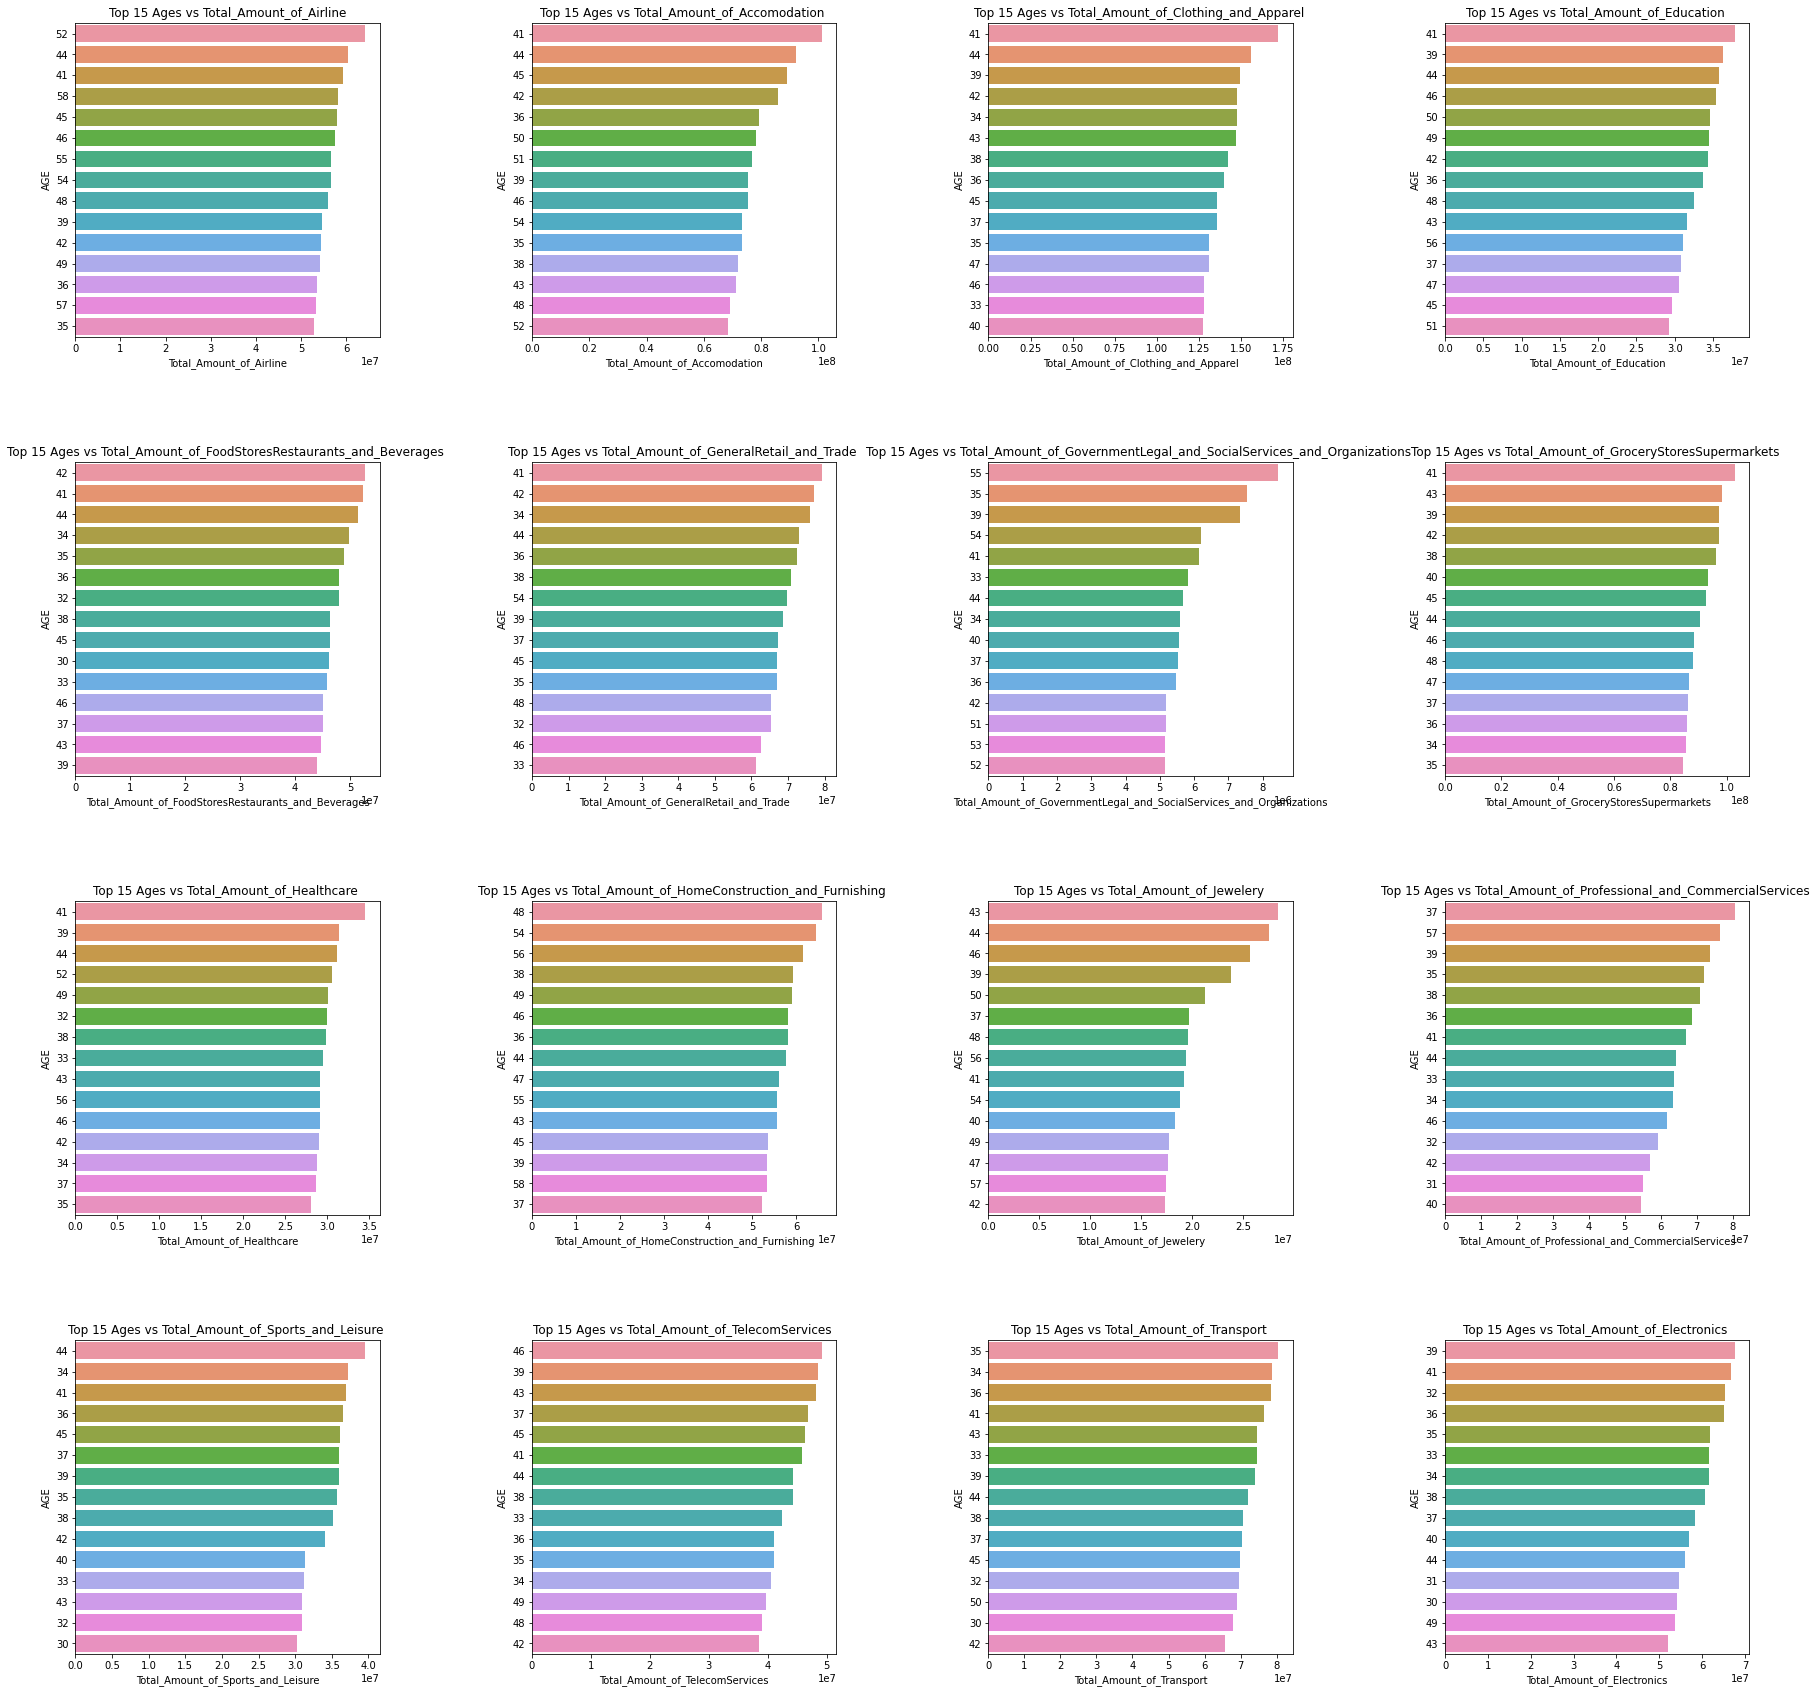

In [195]:
fig, axs = plt.subplots(4 , 4 , figsize=(30,30))
axs=axs.flatten()
plt.subplots_adjust( wspace=0.5, hspace=0.4)
top_count = 15
AirLine_Age_top = AirLine_Age["Total_Amount_of_Airline"].head(top_count)
Accomodation_Age_top = Accomodation_Age['Total_Amount_of_Accomodation'].head(top_count)
Clothing_Age_top = Clothing_Age['Total_Amount_of_Clothing_and_Apparel'].head(top_count)
Education_Age_top = Education_Age['Total_Amount_of_Education'].head(top_count)
Food_Age_top = Food_Age['Total_Amount_of_FoodStoresRestaurants_and_Beverages'].head(top_count)
Retail_Age_top = Retail_Age['Total_Amount_of_GeneralRetail_and_Trade'].head(top_count)
Governmental_Age_top = Governmental_Age['Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations'].head(top_count)
Grocery_Age_top = Grocery_Age['Total_Amount_of_GroceryStoresSupermarkets'].head(top_count)
HealthCare_Age_top = HealthCare_Age['Total_Amount_of_Healthcare'].head(top_count)
HomeConstruction_Age_top = HomeConstruction_Age['Total_Amount_of_HomeConstruction_and_Furnishing'].head(top_count)
Jewelery_Age_top = Jewelery_Age['Total_Amount_of_Jewelery'].head(top_count)
Professional_Age_top = Professional_Age['Total_Amount_of_Professional_and_CommercialServices'].head(top_count)
Sports_Age_top = Sports_Age['Total_Amount_of_Sports_and_Leisure'].head(top_count)
Telecom_Age_top = Telecom_Age['Total_Amount_of_TelecomServices'].head(top_count)
Transport_Age_top = Transport_Age['Total_Amount_of_Transport'].head(top_count)
Electronics_Age_top = Electronics_Age['Total_Amount_of_Electronics'].head(top_count)



sns.barplot(y=AirLine_Age_top.index.astype('str') , x=AirLine_Age_top , ax=axs[0])
sns.barplot(y=Accomodation_Age_top.index.astype('str') , x=Accomodation_Age_top , ax = axs[1])
sns.barplot(y=Clothing_Age_top.index.astype('str') , x=Clothing_Age_top , ax = axs[2])
sns.barplot(y=Education_Age_top.index.astype('str') , x=Education_Age_top , ax = axs[3])
sns.barplot(y=Food_Age_top.index.astype('str') , x=Food_Age_top , ax = axs[4])
sns.barplot(y=Retail_Age_top.index.astype('str') , x=Retail_Age_top , ax = axs[5])
sns.barplot(y=Governmental_Age_top.index.astype('str') , x=Governmental_Age_top , ax = axs[6])
sns.barplot(y=Grocery_Age_top.index.astype('str') , x=Grocery_Age_top , ax = axs[7])
sns.barplot(y=HealthCare_Age_top.index.astype('str') , x=HealthCare_Age_top , ax = axs[8])
sns.barplot(y=HomeConstruction_Age_top.index.astype('str') , x=HomeConstruction_Age_top , ax = axs[9])
sns.barplot(y=Jewelery_Age_top.index.astype('str') , x=Jewelery_Age_top , ax = axs[10])
sns.barplot(y=Professional_Age_top.index.astype('str') , x=Professional_Age_top , ax = axs[11])
sns.barplot(y=Sports_Age_top.index.astype('str') , x=Sports_Age_top , ax = axs[12])
sns.barplot(y=Telecom_Age_top.index.astype('str') , x=Telecom_Age_top , ax = axs[13])
sns.barplot(y=Transport_Age_top.index.astype('str') , x=Transport_Age_top , ax = axs[14])
sns.barplot(y=Electronics_Age_top.index.astype('str') , x=Electronics_Age_top , ax = axs[15])


axs[0].set_title(f'Top {top_count} Ages vs Total_Amount_of_Airline')
axs[1].set_title(f'Top {top_count} Ages vs Total_Amount_of_Accomodation ')
axs[2].set_title(f'Top {top_count} Ages vs Total_Amount_of_Clothing_and_Apparel ')
axs[3].set_title(f'Top {top_count} Ages vs Total_Amount_of_Education ')
axs[4].set_title(f'Top {top_count} Ages vs Total_Amount_of_FoodStoresRestaurants_and_Beverages ')
axs[5].set_title(f'Top {top_count} Ages vs Total_Amount_of_GeneralRetail_and_Trade ')
axs[6].set_title(f'Top {top_count} Ages vs Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations ')
axs[7].set_title(f'Top {top_count} Ages vs Total_Amount_of_GroceryStoresSupermarkets ')
axs[8].set_title(f'Top {top_count} Ages vs Total_Amount_of_Healthcare ')
axs[9].set_title(f'Top {top_count} Ages vs Total_Amount_of_HomeConstruction_and_Furnishing ')
axs[10].set_title(f'Top {top_count} Ages vs Total_Amount_of_Jewelery ')
axs[11].set_title(f'Top {top_count} Ages vs Total_Amount_of_Professional_and_CommercialServices ')
axs[12].set_title(f'Top {top_count} Ages vs Total_Amount_of_Sports_and_Leisure ')
axs[13].set_title(f'Top {top_count} Ages vs Total_Amount_of_TelecomServices ')
axs[14].set_title(f'Top {top_count} Ages vs Total_Amount_of_Transport ')
axs[15].set_title(f'Top {top_count} Ages vs Total_Amount_of_Electronics ')


In [196]:
print( 'min: ' , AirLine_Age_top.index.values.min() , ', max: ' ,  AirLine_Age_top.index.values.max())
print('min: ' , Accomodation_Age_top.index.values.min() , ', max: ' ,  Accomodation_Age_top.index.values.max())
print('min: ' , Clothing_Age_top.index.values.min() , ', max: ' ,  Clothing_Age_top.index.values.max())
print('min: ' , Education_Age_top.index.values.min() , ', max: ' ,  Education_Age_top.index.values.max())
print('min: ' , Food_Age_top.index.values.min() , ', max: ' ,  Food_Age_top.index.values.max())
print('min: ' , Retail_Age_top.index.values.min() , ', max: ' ,  Retail_Age_top.index.values.max())
print('min: ' , Governmental_Age_top.index.values.min() , ', max: ' ,  Governmental_Age_top.index.values.max())
print('min: ' , Grocery_Age_top.index.values.min() , ', max: ' ,  Grocery_Age_top.index.values.max())
print('min: ' , HealthCare_Age_top.index.values.min() , ', max: ' ,  HealthCare_Age_top.index.values.max())
print('min: ' , HomeConstruction_Age_top.index.values.min() , ', max: ' ,  HomeConstruction_Age_top.index.values.max())
print('min: ' , Jewelery_Age_top.index.values.min() , ', max: ' ,  Jewelery_Age_top.index.values.max())
print('min: ' , Professional_Age_top.index.values.min() , ', max: ' ,  Professional_Age_top.index.values.max())
print('min: ' , Sports_Age_top.index.values.min() , ', max: ' ,  Sports_Age_top.index.values.max())
print('min: ' , Telecom_Age_top.index.values.min() , ', max: ' ,  Telecom_Age_top.index.values.max())
print('min: ' , Transport_Age_top.index.values.min() , ', max: ' ,  Transport_Age_top.index.values.max())
print('min: ' , Electronics_Age_top.index.values.min() , ', max: ' ,  Electronics_Age_top.index.values.max())



min:  35 , max:  58
min:  35 , max:  54
min:  33 , max:  47
min:  36 , max:  56
min:  30 , max:  46
min:  32 , max:  54
min:  33 , max:  55
min:  34 , max:  48
min:  32 , max:  56
min:  36 , max:  58
min:  37 , max:  57
min:  31 , max:  57
min:  30 , max:  45
min:  33 , max:  49
min:  30 , max:  50
min:  30 , max:  49


The Age range between **30** and **58** years old are the ones that spend the most in all categories.


> Mrechant groups vs Total Amount (bar chart)




In [197]:
merchants = [w[10:] for w in merchant_column_index]
merchants

['Airline',
 'Accomodation',
 'Clothing_and_Apparel',
 'Education',
 'FoodStoresRestaurants_and_Beverages',
 'GeneralRetail_and_Trade',
 'GovernmentLegal_and_SocialServices_and_Organizations',
 'GroceryStoresSupermarkets',
 'Healthcare',
 'HomeConstruction_and_Furnishing',
 'Jewelery',
 'Professional_and_CommercialServices',
 'Sports_and_Leisure',
 'TelecomServices',
 'Transport',
 'Electronics']

In [198]:
cols=['Total_'+col for col in merchant_column_index]
cols_y1=[col + '_Y1' for col in merchant_column_index ]
cols_y2= [col + '_Y2' for col in merchant_column_index ]

total_sums=creditData_final[cols].sum(axis=0)
total_sums_y1=creditData_final[cols_y1].sum(axis=0)
total_sums_y2=creditData_final[cols_y2].sum(axis=0)


In [199]:
merchants_sum_df = pd.DataFrame({'Total_Y1_Amount':total_sums_y1.values,'Total_Y2_Amount':total_sums_y2.values,'Total_Amount':total_sums.values},index=merchants)
merchants_sum_df.head(16)

,Total_Y1_Amount,Total_Y2_Amount,Total_Amount
Airline,7.448e+08,1.347e+09,2.092e+09
Accomodation,1.027e+09,1.709e+09,2.736e+09
Clothing_and_Apparel,1.792e+09,2.947e+09,4.739e+09
Education,3.538e+08,6.264e+08,9.802e+08
FoodStoresRestaurants_and_Beverages,5.473e+08,1.158e+09,1.705e+09
GeneralRetail_and_Trade,9.408e+08,1.449e+09,2.390e+09
GovernmentLegal_and_SocialServices_and_Organizations,6.322e+07,1.296e+08,1.929e+08
GroceryStoresSupermarkets,1.106e+09,1.885e+09,2.992e+09
Healthcare,4.063e+08,7.171e+08,1.123e+09
HomeConstruction_and_Furnishing,7.940e+08,1.206e+09,2.000e+09


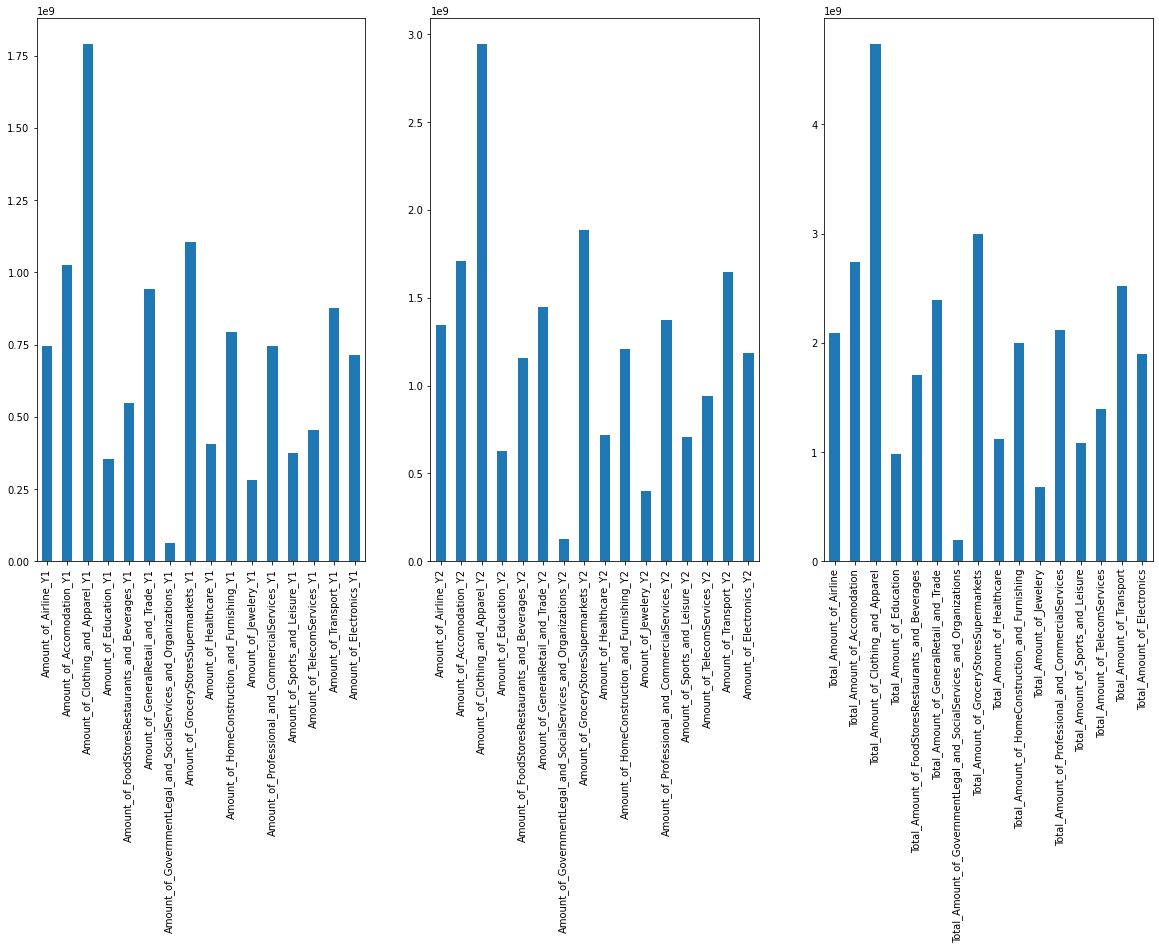

In [200]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
ax.flatten()

total_sums_y1.plot(kind='bar',ax=ax[0])
total_sums_y2.plot(kind='bar',ax=ax[1])
total_sums.plot(kind='bar',ax=ax[2])



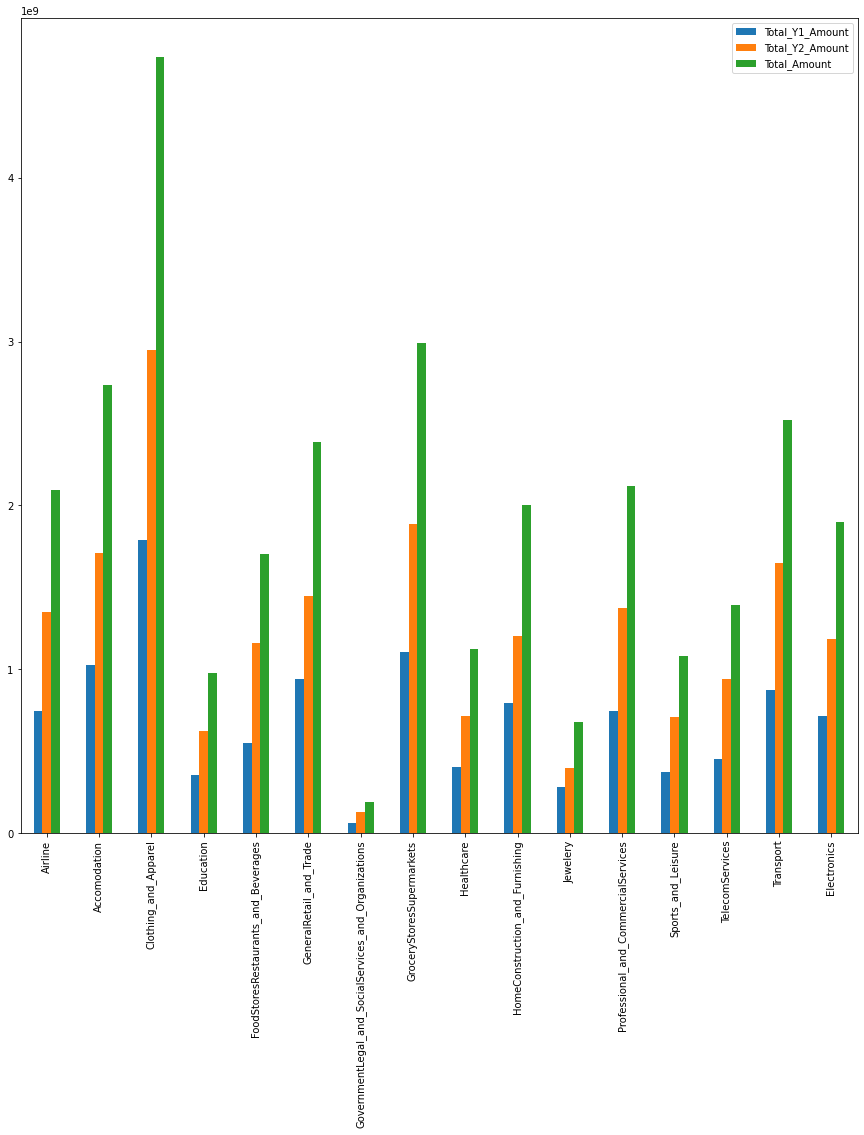

In [201]:
merchants_sum_df.plot( kind="bar",figsize=(15,15))
plt.show()

The Merchant Group in which the customers spends most using Credit Card customers is Clothing and Apparel, followed by Grocery and Supermarkets, Accomodation, and Transport.

The Merchant Group in which the customers spends least using Credit Card customers is Government Legal and Social Services, followed by Jewlery and Education

It is also clear that the amount spent is the second year is greater than the amount spent in the first year in all merchant groups, with an increase of nearly half the amount.

->>>> do same for counts


> Time vs Total Amount - for each merchant group



In [202]:
Quarters=[]
Quarters_sums=[]
c=0
for i in range(1,3):
  for j in range(1,5):
    Quarters.append([col+f'_Q{j}_Y{i}' for col in merchant_column_index])
    Quarters_sums.append(creditData_final[Quarters[c]].sum(axis=0))
    c+=1



In [203]:
Quarters_sums

[Amount_of_Airline_Q1_Y1                                                 1.131e+08
 Amount_of_Accomodation_Q1_Y1                                            1.474e+08
 Amount_of_Clothing_and_Apparel_Q1_Y1                                    3.123e+08
 Amount_of_Education_Q1_Y1                                               5.920e+07
 Amount_of_FoodStoresRestaurants_and_Beverages_Q1_Y1                     8.183e+07
 Amount_of_GeneralRetail_and_Trade_Q1_Y1                                 1.663e+08
 Amount_of_GovernmentLegal_and_SocialServices_and_Organizations_Q1_Y1    9.164e+06
 Amount_of_GroceryStoresSupermarkets_Q1_Y1                               1.901e+08
 Amount_of_Healthcare_Q1_Y1                                              7.014e+07
 Amount_of_HomeConstruction_and_Furnishing_Q1_Y1                         1.428e+08
 Amount_of_Jewelery_Q1_Y1                                                6.620e+07
 Amount_of_Professional_and_CommercialServices_Q1_Y1                     1.180e+08
 Amo

In [204]:
merchants_TimeSeries = pd.DataFrame({'Q1Y1':Quarters_sums[0].values,'Q2Y1':Quarters_sums[1].values,'Q3Y1':Quarters_sums[2].values,'Q4Y1':Quarters_sums[3].values,'Q1Y2':Quarters_sums[4].values,'Q2Y2':Quarters_sums[5].values,'Q3Y2':Quarters_sums[6].values,'Q4Y2':Quarters_sums[7].values},index=merchants)
merchants_TimeSeries.head(16)

,Q1Y1,Q2Y1,Q3Y1,Q4Y1,Q1Y2,Q2Y2,Q3Y2,Q4Y2
Airline,1.131e+08,1.917e+08,2.117e+08,2.283e+08,2.872e+08,3.319e+08,3.612e+08,3.672e+08
Accomodation,1.474e+08,2.406e+08,3.694e+08,2.697e+08,3.121e+08,4.130e+08,5.356e+08,4.479e+08
Clothing_and_Apparel,3.123e+08,4.319e+08,4.962e+08,5.514e+08,5.600e+08,6.807e+08,7.555e+08,9.511e+08
Education,5.920e+07,6.989e+07,1.222e+08,1.026e+08,1.373e+08,1.072e+08,2.073e+08,1.746e+08
FoodStoresRestaurants_and_Beverages,8.183e+07,1.153e+08,1.689e+08,1.813e+08,2.195e+08,2.716e+08,3.234e+08,3.431e+08
GeneralRetail_and_Trade,1.663e+08,2.203e+08,2.627e+08,2.915e+08,2.766e+08,3.204e+08,3.861e+08,4.658e+08
GovernmentLegal_and_SocialServices_and_Organizations,9.164e+06,1.574e+07,2.161e+07,1.671e+07,2.319e+07,3.927e+07,3.446e+07,3.273e+07
GroceryStoresSupermarkets,1.901e+08,2.807e+08,2.933e+08,3.423e+08,4.042e+08,4.777e+08,4.804e+08,5.232e+08
Healthcare,7.014e+07,1.033e+08,1.086e+08,1.242e+08,1.560e+08,1.668e+08,1.822e+08,2.121e+08
HomeConstruction_and_Furnishing,1.428e+08,1.999e+08,1.785e+08,2.728e+08,2.521e+08,2.800e+08,3.035e+08,3.703e+08


In [205]:
merchants_TimeSeries=merchants_TimeSeries.T
merchants_TimeSeries

,Airline,Accomodation,Clothing_and_Apparel,Education,FoodStoresRestaurants_and_Beverages,GeneralRetail_and_Trade,GovernmentLegal_and_SocialServices_and_Organizations,GroceryStoresSupermarkets,Healthcare,HomeConstruction_and_Furnishing,Jewelery,Professional_and_CommercialServices,Sports_and_Leisure,TelecomServices,Transport,Electronics
Q1Y1,1.131e+08,1.474e+08,3.123e+08,5.920e+07,8.183e+07,1.663e+08,9.164e+06,1.901e+08,7.014e+07,1.428e+08,6.620e+07,1.180e+08,6.929e+07,6.359e+07,1.359e+08,1.149e+08
Q2Y1,1.917e+08,2.406e+08,4.319e+08,6.989e+07,1.153e+08,2.203e+08,1.574e+07,2.807e+08,1.033e+08,1.999e+08,7.465e+07,1.863e+08,8.236e+07,1.043e+08,2.040e+08,1.484e+08
Q3Y1,2.117e+08,3.694e+08,4.962e+08,1.222e+08,1.689e+08,2.627e+08,2.161e+07,2.933e+08,1.086e+08,1.785e+08,7.918e+07,2.061e+08,1.091e+08,1.241e+08,2.638e+08,1.880e+08
Q4Y1,2.283e+08,2.697e+08,5.514e+08,1.026e+08,1.813e+08,2.915e+08,1.671e+07,3.423e+08,1.242e+08,2.728e+08,6.209e+07,2.342e+08,1.129e+08,1.621e+08,2.715e+08,2.613e+08
Q1Y2,2.872e+08,3.121e+08,5.600e+08,1.373e+08,2.195e+08,2.766e+08,2.319e+07,4.042e+08,1.560e+08,2.521e+08,7.960e+07,2.610e+08,1.454e+08,2.074e+08,3.076e+08,2.353e+08
Q2Y2,3.319e+08,4.130e+08,6.807e+08,1.072e+08,2.716e+08,3.204e+08,3.927e+07,4.777e+08,1.668e+08,2.800e+08,7.930e+07,2.975e+08,1.579e+08,2.101e+08,3.742e+08,2.681e+08
Q3Y2,3.612e+08,5.356e+08,7.555e+08,2.073e+08,3.234e+08,3.861e+08,3.446e+07,4.804e+08,1.822e+08,3.035e+08,1.063e+08,3.691e+08,1.826e+08,2.270e+08,4.662e+08,3.262e+08
Q4Y2,3.672e+08,4.479e+08,9.511e+08,1.746e+08,3.431e+08,4.658e+08,3.273e+07,5.232e+08,2.121e+08,3.703e+08,1.332e+08,4.441e+08,2.224e+08,2.963e+08,4.984e+08,3.577e+08


In [206]:
Qs=merchants_TimeSeries.index.values.tolist() 

Airline
Accomodation
Clothing_and_Apparel
Education
FoodStoresRestaurants_and_Beverages
GeneralRetail_and_Trade
GovernmentLegal_and_SocialServices_and_Organizations
GroceryStoresSupermarkets
Healthcare
HomeConstruction_and_Furnishing
Jewelery
Professional_and_CommercialServices
Sports_and_Leisure
TelecomServices
Transport
Electronics


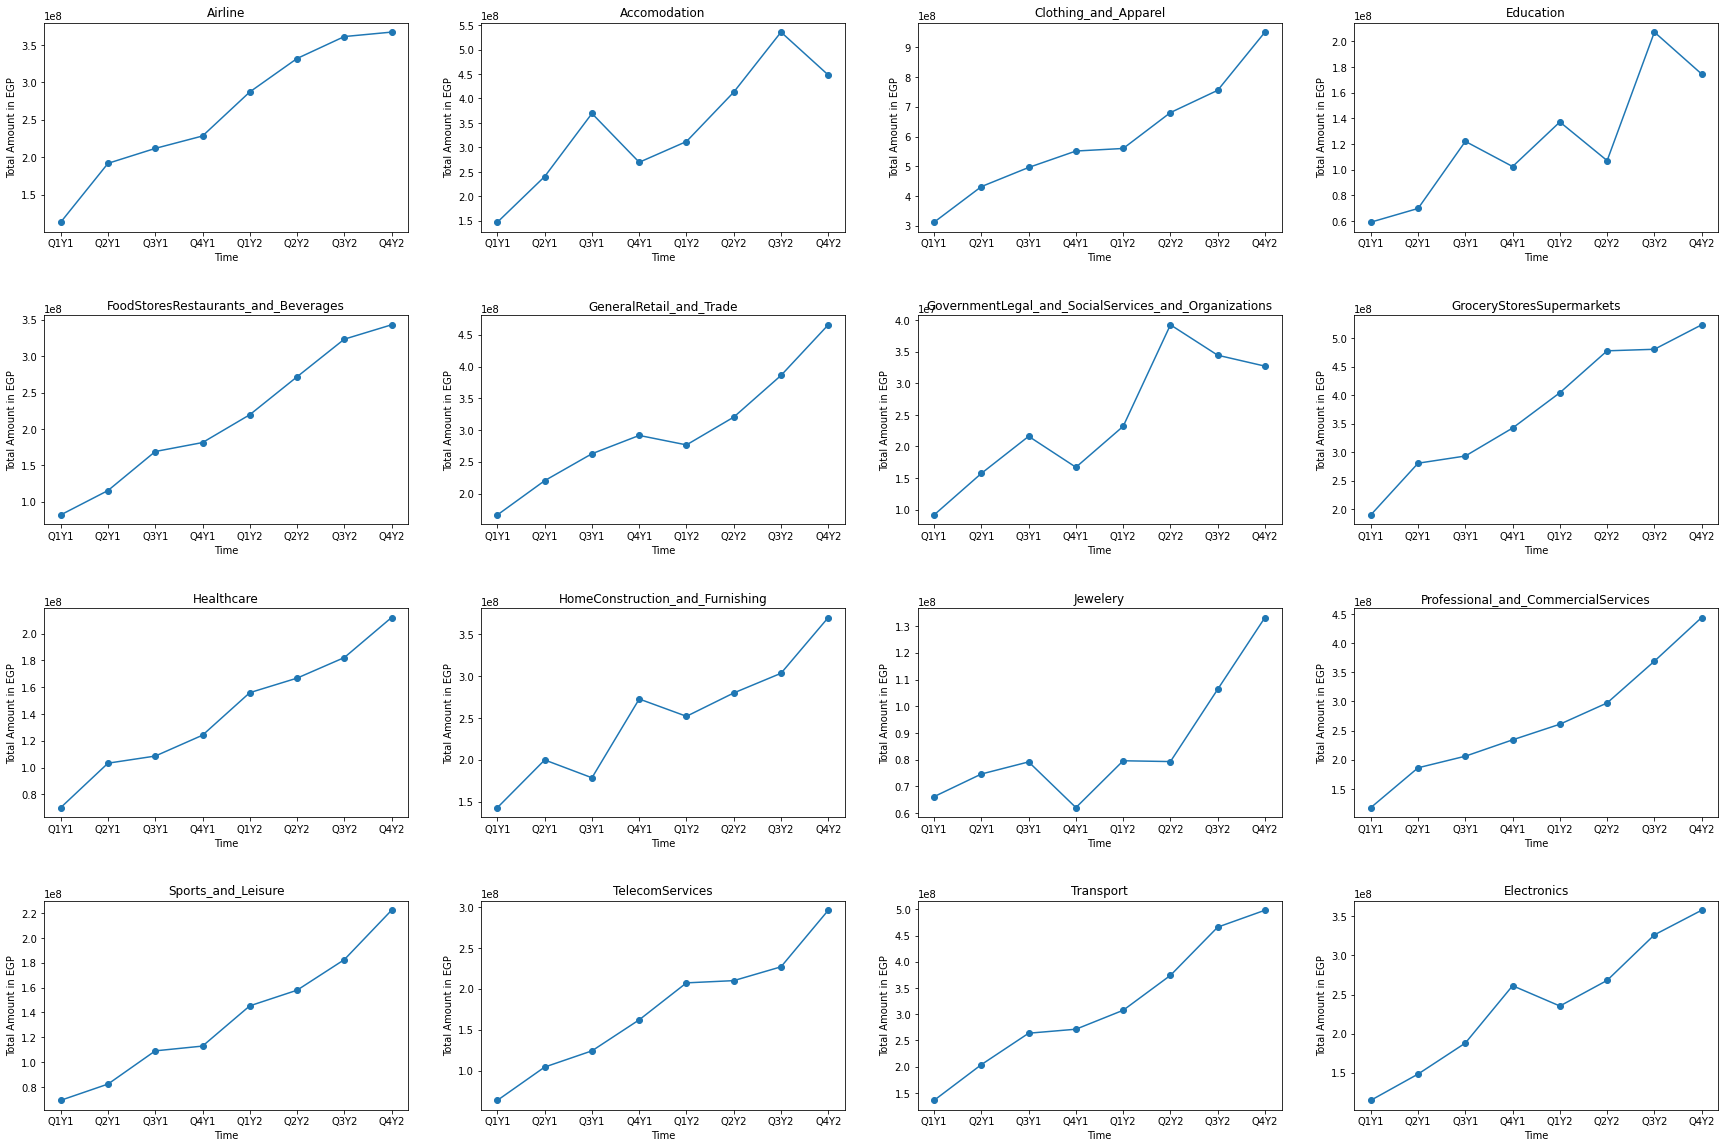

In [207]:
fig,ax = plt.subplots(4,4,figsize=(30,20))
plt.subplots_adjust( wspace=0.2, hspace=0.4)
ax.flatten()
k=0
for i in range(0,4):
  for j in range(0,4):
    category=merchants[(i * 4) + j]
    print(category)
    merchants_TimeSeries[category].plot(kind='line',marker='o',ax=ax[i][j],title=category,ylabel="Total Amount in EGP",xlabel="Time")

#merchants_TimeSeries['Airline'].plot(kind='line',marker='o',ax=ax[0][0])


#total_sums_y2.plot(kind='bar',ax=ax[1])
#total_sums.plot(kind='bar',ax=ax[2])
#merchants_TimeSeries.T.plot.line(y=['Airline'])

Customers tend to spend more using credit cards in almost all merchant groups by the time especially clothing, grocery stores, food & restaurants, commercial services, transport, sports . We can notice the increase of the total Amount of retail transations in the 16 groups in the span of 2 years. However, there are some groups that experience decreases in some quarters. For example, Education sector is flactuating (It makes sense since educational fees are usually spent at the beginning of each academic term/year). Also, we can see the decrease in Accomodation total spent amount at the 4th quarter of both years, and a high increse in jewlery group in the second quarter of the second year (maybe due to decrease in gold price for example). 

In [208]:
#merchants_TimeSeries.plot.line(subplots=True,layout=(4,4), figsize=(30,20),sharex=True, sharey=False,marker='o' )


### Gender Analysis 

In [209]:
genderData = creditData_final.groupby('GENDER').agg('sum')

In [210]:
creditData_final['GENDER'].value_counts()

MALE      84956
FEMALE    41970
NA        16991
Name: GENDER, dtype: int64

In [211]:
print(creditData_final['GENDER'].value_counts()['FEMALE'] / creditData_final['GENDER'].value_counts()['MALE']  , ' is the ratio between Men to women in the dataset.')

0.4940204341070672  is the ratio between Men to women in the dataset.


In [212]:
genderData.head()

,CUSTOMER_ID,CARD_ID,AGE,CARD_TENURE,Count_of_Airline_Q1_Y1,Count_of_Airline_Q2_Y1,Count_of_Airline_Q3_Y1,Count_of_Airline_Q4_Y1,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Count_of_Accomodation_Q1_Y1,Count_of_Accomodation_Q2_Y1,Count_of_Accomodation_Q3_Y1,Count_of_Accomodation_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,Count_of_Clothing_and_Apparel_Q1_Y1,Count_of_Clothing_and_Apparel_Q2_Y1,Count_of_Clothing_and_Apparel_Q3_Y1,Count_of_Clothing_and_Apparel_Q4_Y1,Amount_of_Clothing_and_Apparel_Q1_Y1,Amount_of_Clothing_and_Apparel_Q2_Y1,Amount_of_Clothing_and_Apparel_Q3_Y1,Amount_of_Clothing_and_Apparel_Q4_Y1,Count_of_Education_Q1_Y1,Count_of_Education_Q2_Y1,Count_of_Education_Q3_Y1,Count_of_Education_Q4_Y1,Amount_of_Education_Q1_Y1,Amount_of_Education_Q2_Y1,Amount_of_Education_Q3_Y1,Amount_of_Education_Q4_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q1_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q2_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q3_Y1,Count_of_FoodStoresRestaurants_and_Beverages_Q4_Y1,...,Amount_of_Sports_and_Leisure_Y1,Amount_of_TelecomServices_Y1,Amount_of_Transport_Y1,Amount_of_Electronics_Y1,Amount_of_Airline_Y2,Amount_of_Accomodation_Y2,Amount_of_Clothing_and_Apparel_Y2,Amount_of_Education_Y2,Amount_of_FoodStoresRestaurants_and_Beverages_Y2,Amount_of_GeneralRetail_and_Trade_Y2,Amount_of_GovernmentLegal_and_SocialServices_and_Organizations_Y2,Amount_of_GroceryStoresSupermarkets_Y2,Amount_of_Healthcare_Y2,Amount_of_HomeConstruction_and_Furnishing_Y2,Amount_of_Jewelery_Y2,Amount_of_Professional_and_CommercialServices_Y2,Amount_of_Sports_and_Leisure_Y2,Amount_of_TelecomServices_Y2,Amount_of_Transport_Y2,Amount_of_Electronics_Y2,Total_Amount_of_Airline,Total_Amount_of_Accomodation,Total_Amount_of_Clothing_and_Apparel,Total_Amount_of_Education,Total_Amount_of_FoodStoresRestaurants_and_Beverages,Total_Amount_of_GeneralRetail_and_Trade,Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations,Total_Amount_of_GroceryStoresSupermarkets,Total_Amount_of_Healthcare,Total_Amount_of_HomeConstruction_and_Furnishing,Total_Amount_of_Jewelery,Total_Amount_of_Professional_and_CommercialServices,Total_Amount_of_Sports_and_Leisure,Total_Amount_of_TelecomServices,Total_Amount_of_Transport,Total_Amount_of_Electronics,Transaction_value_score,Transaction_value_score_normalized,Activity_Score,Activity_Score_Normalized
GENDER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FEMALE,2494641735,3022517043,1713965,110505,6280.0,8602.0,10587.0,9727.0,2.372e+07,4.173e+07,4.132e+07,4.329e+07,8659.0,12779.0,18980.0,13299.0,2.302e+07,3.743e+07,6.072e+07,4.229e+07,156618.0,222984.0,259651.0,220147.0,1.160e+08,1.558e+08,1.831e+08,1.997e+08,4878.0,4749.0,7555.0,8751.0,1.179e+07,1.652e+07,3.027e+07,2.358e+07,59674.0,82652.0,116149.0,123705.0,...,1.170e+08,5.899e+07,1.371e+08,1.145e+08,2.623e+08,2.509e+08,1.117e+09,1.410e+08,2.370e+08,4.341e+08,2.300e+07,5.048e+08,2.058e+08,2.729e+08,1.304e+08,2.309e+08,2.157e+08,1.297e+08,2.729e+08,1.841e+08,4.124e+08,4.144e+08,1.772e+09,2.232e+08,3.426e+08,7.122e+08,3.361e+07,7.926e+08,3.097e+08,4.537e+08,2.124e+08,3.502e+08,3.328e+08,1.886e+08,4.100e+08,2.986e+08,3.554e+07,94.559,8.689e+06,540.028
MALE,4915119244,6111842200,3471413,208171,19863.0,26596.0,31871.0,30629.0,7.307e+07,1.160e+08,1.355e+08,1.467e+08,37232.0,56805.0,77703.0,58306.0,9.950e+07,1.663e+08,2.506e+08,1.789e+08,160252.0,232721.0,279447.0,243615.0,1.615e+08,2.193e+08,2.482e+08,2.772e+08,9437.0,9238.0,14109.0,15884.0,3.682e+07,4.547e+07,7.546e+07,6.648e+07,149928.0,218961.0,305478.0,309414.0,...,2.030e+08,3.208e+08,6.049e+08,5.053e+08,8.595e+08,1.191e+09,1.467e+09,4.091e+08,7.534e+08,8.083e+08,8.133e+07,1.135e+09,4.195e+08,7.623e+08,2.202e+08,9.533e+08,3.920e+08,6.696e+08,1.141e+09,8.491e+08,1.331e+09,1.886e+09,2.374e+09,6.333e+08,1.108e+09,1.328e+09,1.237e+08,1.804e+

In [213]:
# Investigating the spending on each merchant by Gender
AirLine_Gender = genderData.sort_values(by='Total_Amount_of_Airline' , ascending=False)
Accomodation_Gender = genderData.sort_values(by='Total_Amount_of_Accomodation' , ascending=False)
Clothing_Gender = genderData.sort_values(by='Total_Amount_of_Clothing_and_Apparel' , ascending=False)
Education_Gender = genderData.sort_values(by='Total_Amount_of_Education' , ascending=False)
Food_Gender = genderData.sort_values(by='Total_Amount_of_FoodStoresRestaurants_and_Beverages' , ascending=False)
Retail_Gender = genderData.sort_values(by='Total_Amount_of_GeneralRetail_and_Trade' , ascending=False)
Governmental_Gender = genderData.sort_values(by='Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations' , ascending=False)
Grocery_Gender = genderData.sort_values(by='Total_Amount_of_GroceryStoresSupermarkets' , ascending=False)
HealthCare_Gender = genderData.sort_values(by='Total_Amount_of_Healthcare' , ascending=False)
HomeConstruction_Gender = genderData.sort_values(by='Total_Amount_of_HomeConstruction_and_Furnishing' , ascending=False)
Jewelery_Gender = genderData.sort_values(by='Total_Amount_of_Jewelery' , ascending=False)
Professional_Gender = genderData.sort_values(by='Total_Amount_of_Professional_and_CommercialServices' , ascending=False)
Sports_Gender = genderData.sort_values(by='Total_Amount_of_Sports_and_Leisure' , ascending=False)
Telecom_Gender = genderData.sort_values(by='Total_Amount_of_TelecomServices' , ascending=False)
Transport_Gender= genderData.sort_values(by='Total_Amount_of_Transport' , ascending=False)
Electronics_Gender = genderData.sort_values(by='Total_Amount_of_Electronics' , ascending=False)

Text(0.5, 1.0, 'Gender vs Total_Amount_of_Electronics ')

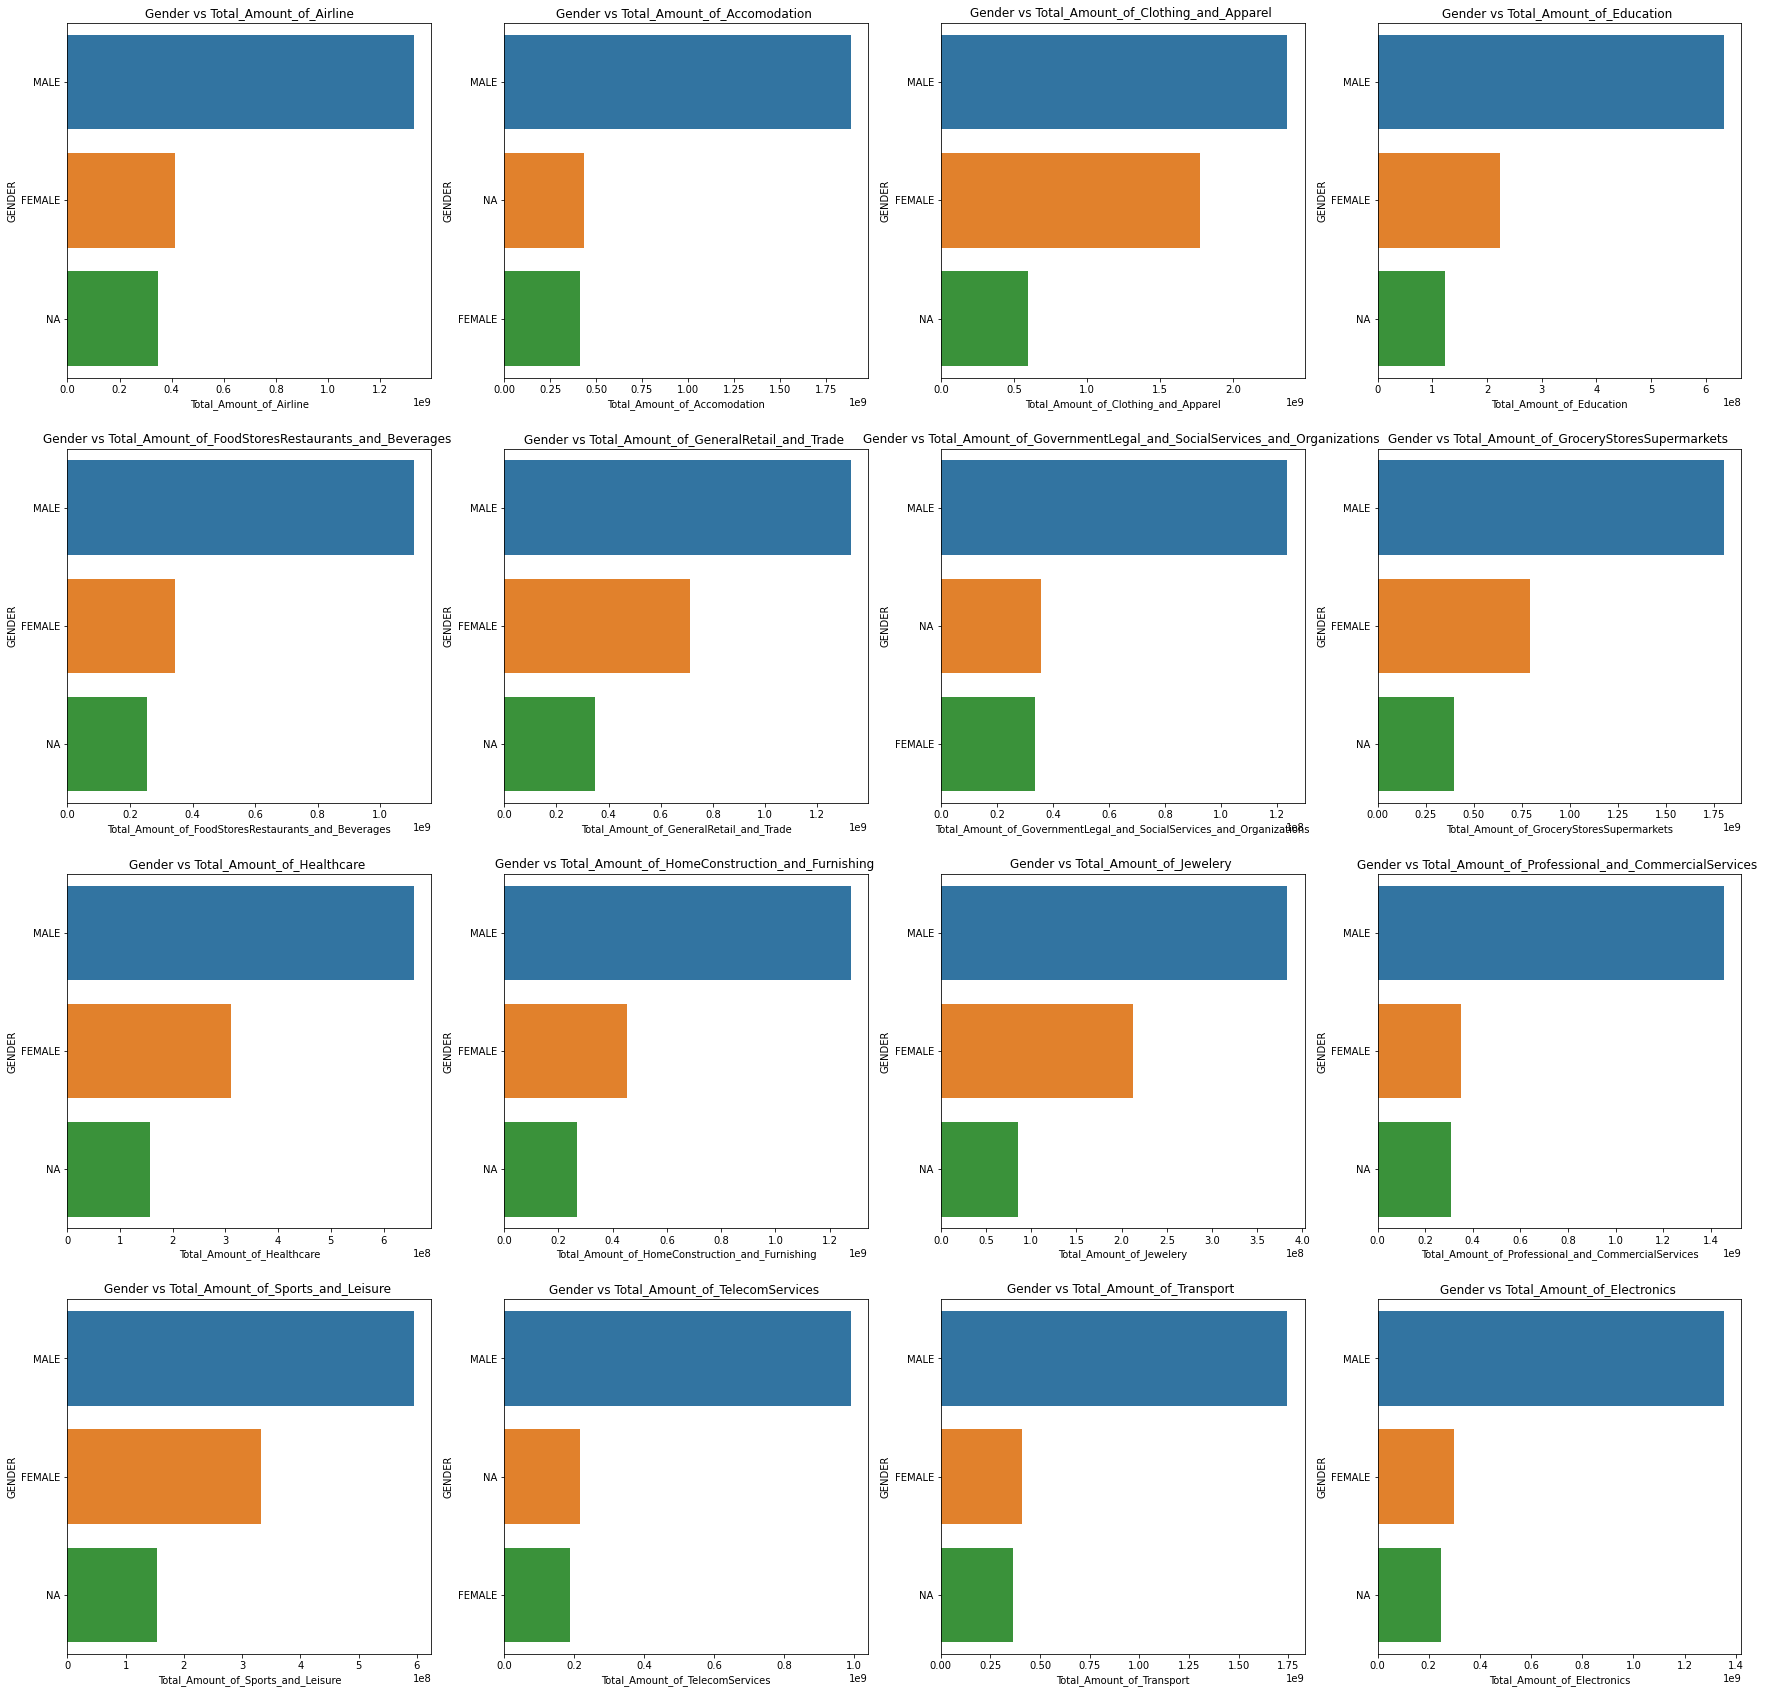

In [214]:
fig, axs = plt.subplots(4 , 4 , figsize=(30,30))
axs=axs.flatten()
AirLine_Gender_top = AirLine_Gender["Total_Amount_of_Airline"]
Accomodation_Gender_top = Accomodation_Gender['Total_Amount_of_Accomodation']
Clothing_Gender_top = Clothing_Gender['Total_Amount_of_Clothing_and_Apparel']
Education_Gender_top = Education_Gender['Total_Amount_of_Education']
Food_Gender_top = Food_Gender['Total_Amount_of_FoodStoresRestaurants_and_Beverages']
Retail_Gender_top = Retail_Gender['Total_Amount_of_GeneralRetail_and_Trade']
Governmental_Gender_top = Governmental_Gender['Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations']
Grocery_Gender_top = Grocery_Gender['Total_Amount_of_GroceryStoresSupermarkets']
HealthCare_Gender_top = HealthCare_Gender['Total_Amount_of_Healthcare']
HomeConstruction_Gender_top = HomeConstruction_Gender['Total_Amount_of_HomeConstruction_and_Furnishing']
Jewelery_Gender_top = Jewelery_Gender['Total_Amount_of_Jewelery']
Professional_Gender_top = Professional_Gender['Total_Amount_of_Professional_and_CommercialServices']
Sports_Gender_top = Sports_Gender['Total_Amount_of_Sports_and_Leisure']
Telecom_Gender_top = Telecom_Gender['Total_Amount_of_TelecomServices']
Transport_Gender_top = Transport_Gender['Total_Amount_of_Transport']
Electronics_Gender_top = Electronics_Gender['Total_Amount_of_Electronics']



sns.barplot(y=AirLine_Gender_top.index.astype('str') , x=AirLine_Gender_top , ax=axs[0])
sns.barplot(y=Accomodation_Gender_top.index.astype('str') , x=Accomodation_Gender_top , ax = axs[1])
sns.barplot(y=Clothing_Gender_top.index.astype('str') , x=Clothing_Gender_top , ax = axs[2])
sns.barplot(y=Education_Gender_top.index.astype('str') , x=Education_Gender_top , ax = axs[3])
sns.barplot(y=Food_Gender_top.index.astype('str') , x=Food_Gender_top , ax = axs[4])
sns.barplot(y=Retail_Gender_top.index.astype('str') , x=Retail_Gender_top , ax = axs[5])
sns.barplot(y=Governmental_Gender_top.index.astype('str') , x=Governmental_Gender_top , ax = axs[6])
sns.barplot(y=Grocery_Gender_top.index.astype('str') , x=Grocery_Gender_top , ax = axs[7])
sns.barplot(y=HealthCare_Gender_top.index.astype('str') , x=HealthCare_Gender_top , ax = axs[8])
sns.barplot(y=HomeConstruction_Gender_top.index.astype('str') , x=HomeConstruction_Gender_top , ax = axs[9])
sns.barplot(y=Jewelery_Gender_top.index.astype('str') , x=Jewelery_Gender_top , ax = axs[10])
sns.barplot(y=Professional_Gender_top.index.astype('str') , x=Professional_Gender_top , ax = axs[11])
sns.barplot(y=Sports_Gender_top.index.astype('str') , x=Sports_Gender_top , ax = axs[12])
sns.barplot(y=Telecom_Gender_top.index.astype('str') , x=Telecom_Gender_top , ax = axs[13])
sns.barplot(y=Transport_Gender_top.index.astype('str') , x=Transport_Gender_top , ax = axs[14])
sns.barplot(y=Electronics_Gender_top.index.astype('str') , x=Electronics_Gender_top , ax = axs[15])


axs[0].set_title(f'Gender vs Total_Amount_of_Airline')
axs[1].set_title(f'Gender vs Total_Amount_of_Accomodation ')
axs[2].set_title(f'Gender vs Total_Amount_of_Clothing_and_Apparel ')
axs[3].set_title(f'Gender vs Total_Amount_of_Education ')
axs[4].set_title(f'Gender vs Total_Amount_of_FoodStoresRestaurants_and_Beverages ')
axs[5].set_title(f'Gender vs Total_Amount_of_GeneralRetail_and_Trade ')
axs[6].set_title(f'Gender vs Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations ')
axs[7].set_title(f'Gender vs Total_Amount_of_GroceryStoresSupermarkets ')
axs[8].set_title(f'Gender vs Total_Amount_of_Healthcare ')
axs[9].set_title(f'Gender vs Total_Amount_of_HomeConstruction_and_Furnishing ')
axs[10].set_title(f'Gender vs Total_Amount_of_Jewelery ')
axs[11].set_title(f'Gender vs Total_Amount_of_Professional_and_CommercialServices ')
axs[12].set_title(f'Gender vs Total_Amount_of_Sports_and_Leisure ')
axs[13].set_title(f'Gender vs Total_Amount_of_TelecomServices ')
axs[14].set_title(f'Gender vs Total_Amount_of_Transport ')
axs[15].set_title(f'Gender vs Total_Amount_of_Electronics ')


After performing Gender analysis, although we have imbalanced classes in the dataset [ MALE vs FEMALE ]  since the ratio between Female to males in the dataset is **0.49** , we found the following:
- Males tend to spend more in all merchants categories (around + 2x compared to women and maybe this is justified by the number of male vs female credit cards available in the sample)
- However, women spend close to males in the following categories [**Clothing, Jewelery, Retail, Healthcare, Sports**] Ordered Respectively.

Targetted Marketing Recommendations:
1.   Tend to Target Males Generally in all aspects. 
2.   Tend to Target Females and empower them in the mentioned fields firstly to increase profit, then focus on enhancing their spendings in the other fields. 





**Analysis based on Avg Spend by Gender in category x = Total amount by gender x / total # of gender x :**

In [215]:
femaleCount=creditData_final['GENDER'].value_counts()['FEMALE']
maleCount=creditData_final['GENDER'].value_counts()['MALE']

In [216]:
GenderAvgAmounts=genderData.iloc[[0]][('Total_'+col for col in merchant_column_index)]/femaleCount
GenderAvgAmounts=GenderAvgAmounts.append(genderData.iloc[[1]][('Total_'+col for col in merchant_column_index)]/maleCount)

In [217]:
GenderAvgAmounts

,Total_Amount_of_Airline,Total_Amount_of_Accomodation,Total_Amount_of_Clothing_and_Apparel,Total_Amount_of_Education,Total_Amount_of_FoodStoresRestaurants_and_Beverages,Total_Amount_of_GeneralRetail_and_Trade,Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations,Total_Amount_of_GroceryStoresSupermarkets,Total_Amount_of_Healthcare,Total_Amount_of_HomeConstruction_and_Furnishing,Total_Amount_of_Jewelery,Total_Amount_of_Professional_and_CommercialServices,Total_Amount_of_Sports_and_Leisure,Total_Amount_of_TelecomServices,Total_Amount_of_Transport,Total_Amount_of_Electronics
GENDER,,,,,,,,,,,,,,,,
FEMALE,9825.618,9872.699,42217.345,5317.510,8164.025,16968.500,800.913,18884.290,7377.922,10810.589,5060.019,8343.612,7928.368,4494.798,9768.082,7113.458
MALE,15664.433,22203.245,27939.538,7454.681,13041.156,15631.763,1455.751,21232.852,7743.870,15044.457,4512.304,17142.049,7004.623,11657.885,20550.128,15942.412


In [218]:
# Investigating the spending on each merchant by Gender
AirLine_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Airline' , ascending=False)
Accomodation_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Accomodation' , ascending=False)
Clothing_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Clothing_and_Apparel' , ascending=False)
Education_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Education' , ascending=False)
Food_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_FoodStoresRestaurants_and_Beverages' , ascending=False)
Retail_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_GeneralRetail_and_Trade' , ascending=False)
Governmental_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations' , ascending=False)
Grocery_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_GroceryStoresSupermarkets' , ascending=False)
HealthCare_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Healthcare' , ascending=False)
HomeConstruction_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_HomeConstruction_and_Furnishing' , ascending=False)
Jewelery_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Jewelery' , ascending=False)
Professional_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Professional_and_CommercialServices' , ascending=False)
Sports_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Sports_and_Leisure' , ascending=False)
Telecom_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_TelecomServices' , ascending=False)
Transport_Gender= GenderAvgAmounts.sort_values(by='Total_Amount_of_Transport' , ascending=False)
Electronics_Gender = GenderAvgAmounts.sort_values(by='Total_Amount_of_Electronics' , ascending=False)

Text(0.5, 1.0, 'Gender vs Total_Amount_of_Electronics ')

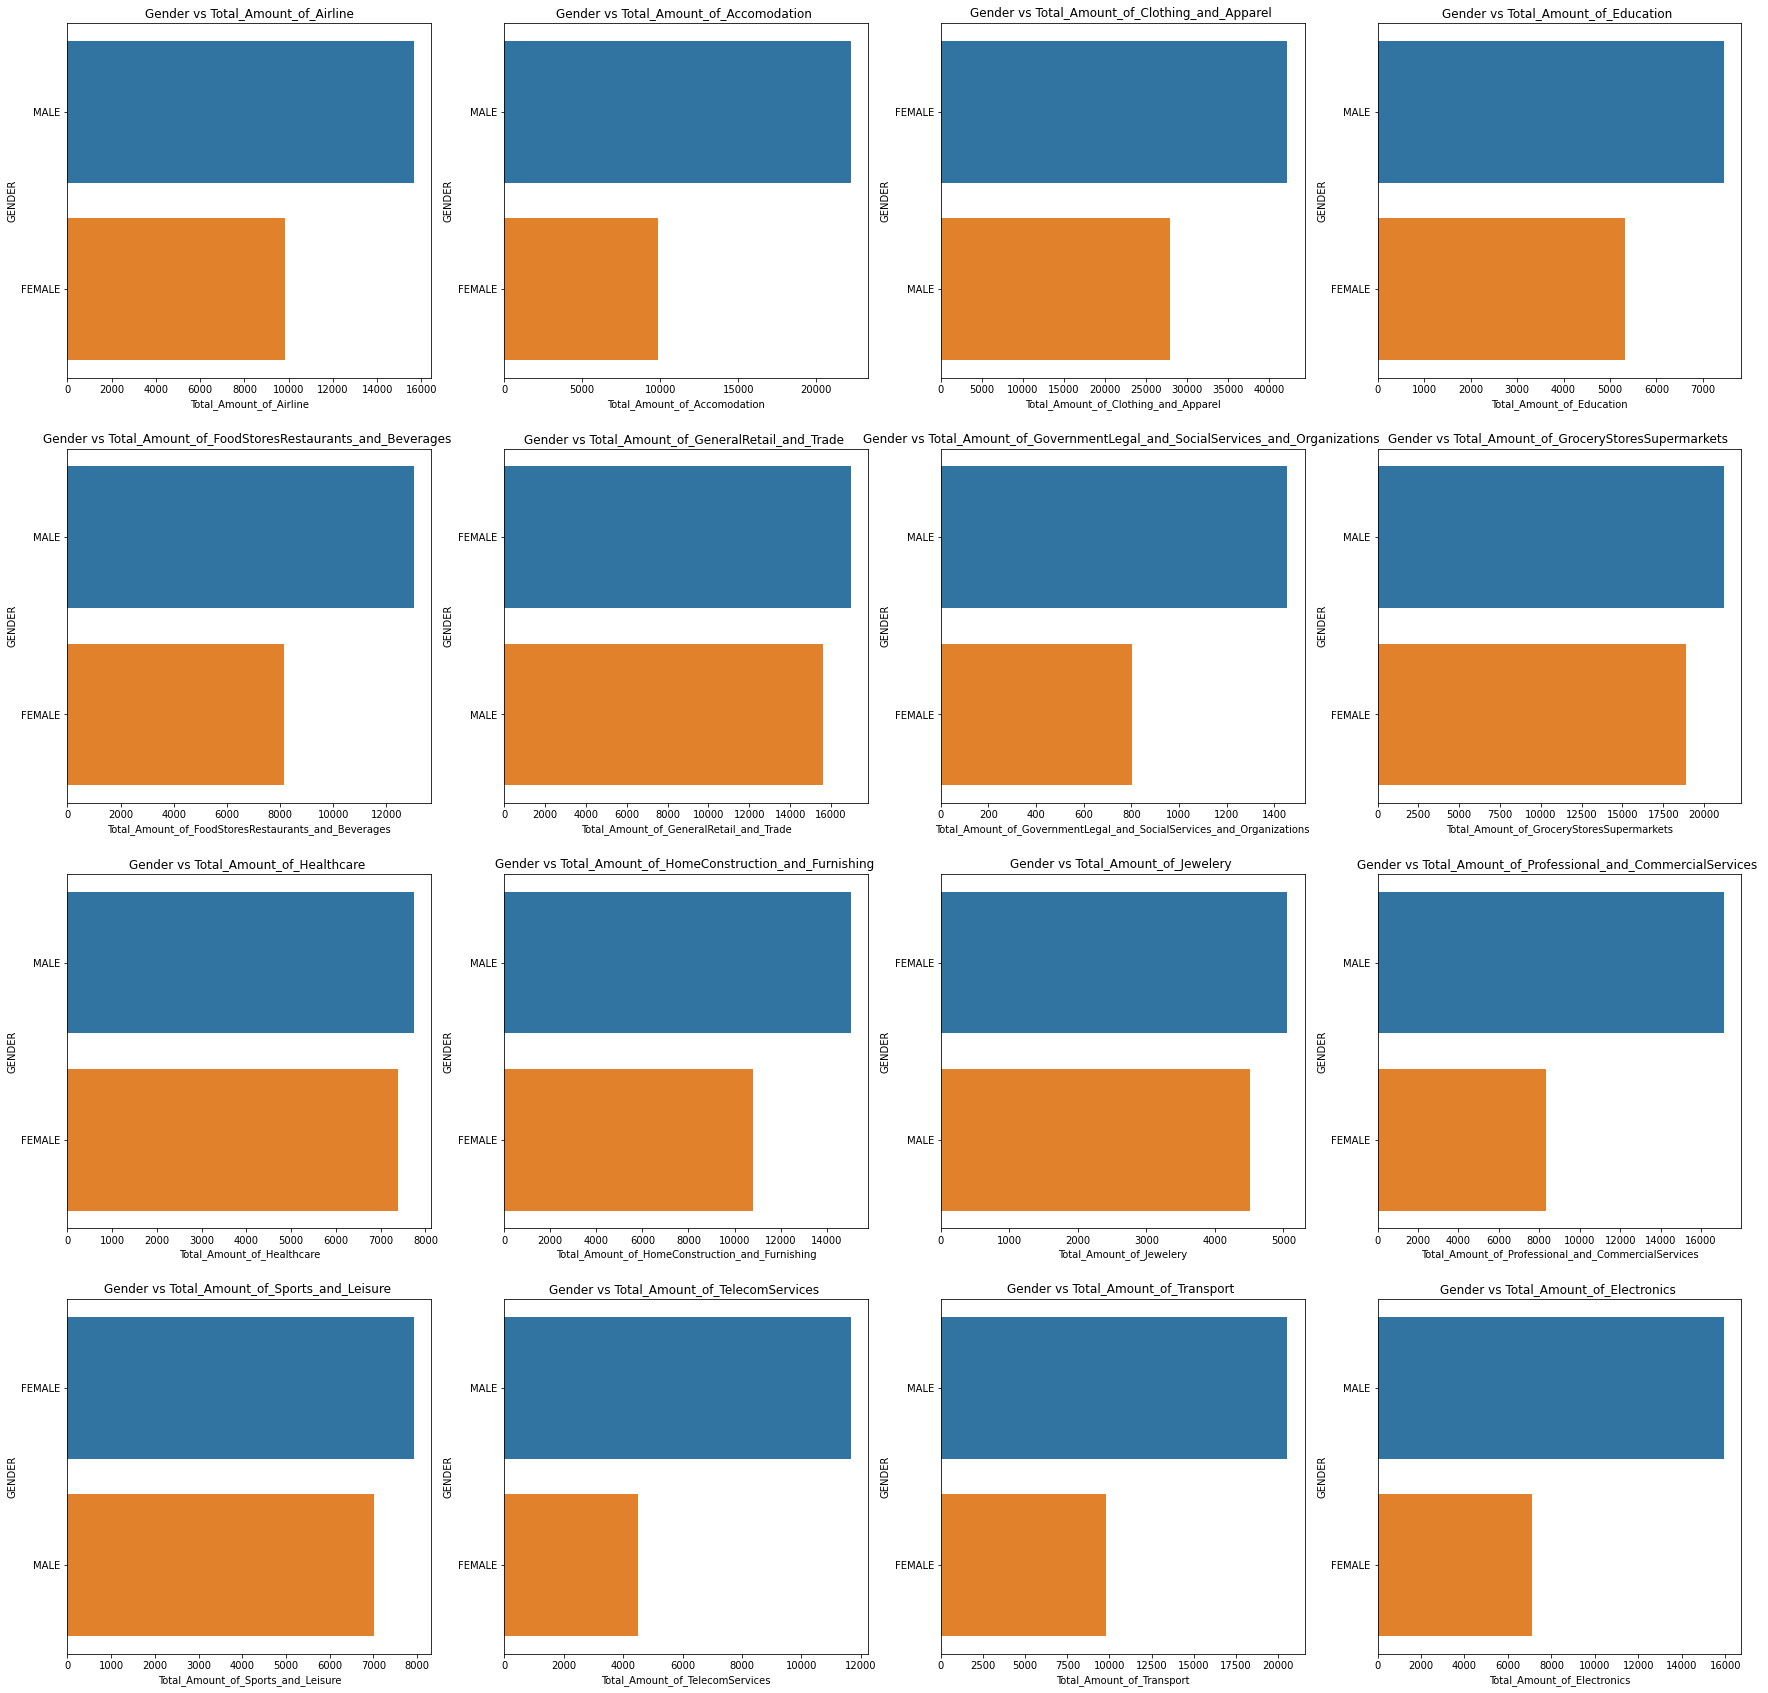

In [219]:
fig, axs = plt.subplots(4 , 4 , figsize=(30,30))
axs=axs.flatten()
AirLine_Gender_top = AirLine_Gender["Total_Amount_of_Airline"]
Accomodation_Gender_top = Accomodation_Gender['Total_Amount_of_Accomodation']
Clothing_Gender_top = Clothing_Gender['Total_Amount_of_Clothing_and_Apparel']
Education_Gender_top = Education_Gender['Total_Amount_of_Education']
Food_Gender_top = Food_Gender['Total_Amount_of_FoodStoresRestaurants_and_Beverages']
Retail_Gender_top = Retail_Gender['Total_Amount_of_GeneralRetail_and_Trade']
Governmental_Gender_top = Governmental_Gender['Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations']
Grocery_Gender_top = Grocery_Gender['Total_Amount_of_GroceryStoresSupermarkets']
HealthCare_Gender_top = HealthCare_Gender['Total_Amount_of_Healthcare']
HomeConstruction_Gender_top = HomeConstruction_Gender['Total_Amount_of_HomeConstruction_and_Furnishing']
Jewelery_Gender_top = Jewelery_Gender['Total_Amount_of_Jewelery']
Professional_Gender_top = Professional_Gender['Total_Amount_of_Professional_and_CommercialServices']
Sports_Gender_top = Sports_Gender['Total_Amount_of_Sports_and_Leisure']
Telecom_Gender_top = Telecom_Gender['Total_Amount_of_TelecomServices']
Transport_Gender_top = Transport_Gender['Total_Amount_of_Transport']
Electronics_Gender_top = Electronics_Gender['Total_Amount_of_Electronics']



sns.barplot(y=AirLine_Gender_top.index.astype('str') , x=AirLine_Gender_top , ax=axs[0])
sns.barplot(y=Accomodation_Gender_top.index.astype('str') , x=Accomodation_Gender_top , ax = axs[1])
sns.barplot(y=Clothing_Gender_top.index.astype('str') , x=Clothing_Gender_top , ax = axs[2])
sns.barplot(y=Education_Gender_top.index.astype('str') , x=Education_Gender_top , ax = axs[3])
sns.barplot(y=Food_Gender_top.index.astype('str') , x=Food_Gender_top , ax = axs[4])
sns.barplot(y=Retail_Gender_top.index.astype('str') , x=Retail_Gender_top , ax = axs[5])
sns.barplot(y=Governmental_Gender_top.index.astype('str') , x=Governmental_Gender_top , ax = axs[6])
sns.barplot(y=Grocery_Gender_top.index.astype('str') , x=Grocery_Gender_top , ax = axs[7])
sns.barplot(y=HealthCare_Gender_top.index.astype('str') , x=HealthCare_Gender_top , ax = axs[8])
sns.barplot(y=HomeConstruction_Gender_top.index.astype('str') , x=HomeConstruction_Gender_top , ax = axs[9])
sns.barplot(y=Jewelery_Gender_top.index.astype('str') , x=Jewelery_Gender_top , ax = axs[10])
sns.barplot(y=Professional_Gender_top.index.astype('str') , x=Professional_Gender_top , ax = axs[11])
sns.barplot(y=Sports_Gender_top.index.astype('str') , x=Sports_Gender_top , ax = axs[12])
sns.barplot(y=Telecom_Gender_top.index.astype('str') , x=Telecom_Gender_top , ax = axs[13])
sns.barplot(y=Transport_Gender_top.index.astype('str') , x=Transport_Gender_top , ax = axs[14])
sns.barplot(y=Electronics_Gender_top.index.astype('str') , x=Electronics_Gender_top , ax = axs[15])


axs[0].set_title(f'Gender vs Total_Amount_of_Airline')
axs[1].set_title(f'Gender vs Total_Amount_of_Accomodation ')
axs[2].set_title(f'Gender vs Total_Amount_of_Clothing_and_Apparel ')
axs[3].set_title(f'Gender vs Total_Amount_of_Education ')
axs[4].set_title(f'Gender vs Total_Amount_of_FoodStoresRestaurants_and_Beverages ')
axs[5].set_title(f'Gender vs Total_Amount_of_GeneralRetail_and_Trade ')
axs[6].set_title(f'Gender vs Total_Amount_of_GovernmentLegal_and_SocialServices_and_Organizations ')
axs[7].set_title(f'Gender vs Total_Amount_of_GroceryStoresSupermarkets ')
axs[8].set_title(f'Gender vs Total_Amount_of_Healthcare ')
axs[9].set_title(f'Gender vs Total_Amount_of_HomeConstruction_and_Furnishing ')
axs[10].set_title(f'Gender vs Total_Amount_of_Jewelery ')
axs[11].set_title(f'Gender vs Total_Amount_of_Professional_and_CommercialServices ')
axs[12].set_title(f'Gender vs Total_Amount_of_Sports_and_Leisure ')
axs[13].set_title(f'Gender vs Total_Amount_of_TelecomServices ')
axs[14].set_title(f'Gender vs Total_Amount_of_Transport ')
axs[15].set_title(f'Gender vs Total_Amount_of_Electronics ')


So, after getting the avergae amount spent by every gender in every merchant group we can see that females spend much more in the clothing and apparel group than males. Also, the avg male spending in categoris like Electronics, Telecom Services, Transport, proffessional and commercial services, governmental services, Acommodation, and Airline are higher than the avg female spending in the same categories. This analysis would greatly help in our targeted marketing approach.

# Customer Level Analysis

## Activity Analysis

In [220]:
creditData_final['NO_OF_Distinct_Months'].value_counts()

0.0     27890
1.0     15412
2.0     10389
3.0      8060
4.0      6583
24.0     6179
5.0      6068
6.0      5238
7.0      4799
21.0     4653
8.0      4489
9.0      4145
10.0     4011
11.0     3696
12.0     3435
14.0     3371
13.0     3331
15.0     3099
16.0     2973
20.0     2939
19.0     2806
17.0     2796
18.0     2770
23.0     2628
22.0     2157
Name: NO_OF_Distinct_Months, dtype: int64

In [221]:
creditData_final['NO_OF_Distinct_Months'].describe()

count    143917.000
mean          7.818
std           7.730
min           0.000
25%           1.000
50%           5.000
75%          14.000
max          24.000
Name: NO_OF_Distinct_Months, dtype: float64

In [222]:
activityData = creditData_final.groupby('NO_OF_Distinct_Months').agg('count')

In [223]:
activityData = activityData['CARD_ID'] # we have a dataframe of  (NO_OF_active_Distinct_Months vs Number of Cards )

Text(0, 0.5, 'Number of Customers')

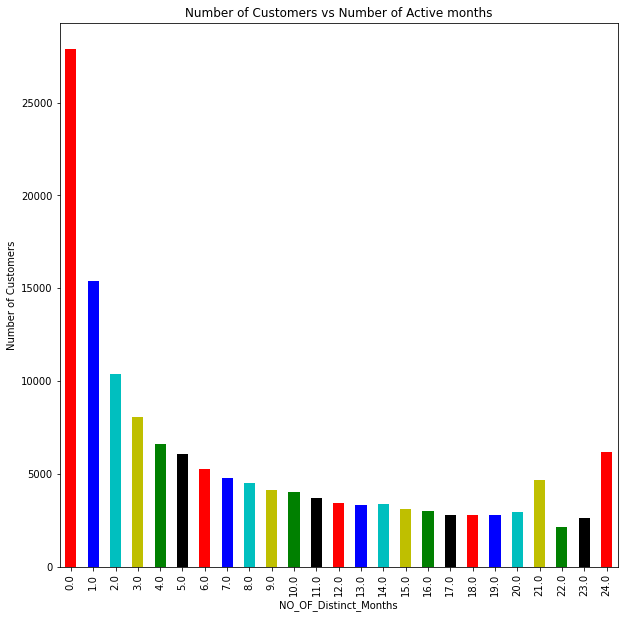

In [224]:
activityData.plot.bar(figsize=(10,10) , color=['r' , 'b' , 'c' , 'y' , 'g' , 'k'])
plt.title('Number of Customers vs Number of Active months')
plt.ylabel('Number of Customers')

It is interesting that most of the users are inactive (0 active months). However, we can segment the users using IQR analysis since we have the following statistics to the following segments: 

- min      -->    0.000 months 
- 25%      -->    1.000 months
- 50%      -->    5.000 months
- 75%      -->    14.000 months
- max      -->    24.000 months

> The segments would be:
- 0-1 --> inactive user 
- 2-5 --> slightly active user 
- 6-14 --> moderately active user 
- 15-24 --> Highly active user 




## Month Activity IQR Analysis and segmentation

In [225]:
creditData_inactive = creditData_final[creditData_final['NO_OF_Distinct_Months'].between(0,1, inclusive=True)]
creditData_slightlyActive = creditData_final[creditData_final['NO_OF_Distinct_Months'].between(2,5, inclusive=True)]
creditData_moderatelyActive = creditData_final[creditData_final['NO_OF_Distinct_Months'].between(6,14, inclusive=True)]
creditData_highlyActive =  creditData_final[creditData_final['NO_OF_Distinct_Months'].between(15,24, inclusive=True)]


In [226]:
print(creditData_inactive.shape)
print(creditData_slightlyActive.shape)
print(creditData_moderatelyActive.shape)
print(creditData_highlyActive.shape)

(43302, 531)
(31100, 531)
(36515, 531)
(33000, 531)


In [227]:
activityDict = {'inactive': creditData_inactive.shape[0] , 'slightly Active':creditData_slightlyActive.shape[0] , 'moderately Active': creditData_moderatelyActive.shape[0] , 'highly Active':creditData_highlyActive.shape[0] }

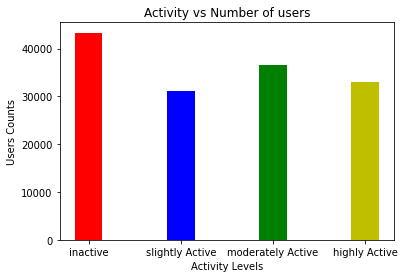

In [228]:
names = list(activityDict.keys())
values = list(activityDict.values())

plt.bar(range(len(activityDict)), values, tick_label=names , color=['r' , 'b' ,'g' , 'y'] , align='center', width=0.3)
plt.title('Activity vs Number of users')
plt.xlabel('Activity Levels')
plt.ylabel('Users Counts')

plt.show()

In [229]:
creditData_inactive['AGE'].value_counts().sort_values(ascending=False)


33    1702
28    1673
32    1658
31    1655
29    1640
30    1630
27    1526
34    1431
26    1405
35    1402
36    1356
38    1270
37    1240
58    1203
39    1198
25    1186
40    1051
41     977
24     952
42     918
43     914
44     877
45     814
46     782
23     731
49     723
47     720
48     711
50     664
54     644
51     628
53     587
52     561
55     545
56     534
57     504
22     479
59     424
60     412
61     389
62     332
63     330
64     292
65     283
66     241
21     235
67     201
68     183
69     165
20     151
70     147
71     126
19     124
72     118
73     108
18     102
75      60
74      59
77      53
17      50
76      46
80      35
78      31
79      30
81      18
83      13
82      13
85       8
86       8
16       7
84       6
88       4
87       3
92       1
89       1
91       1
94       1
Name: AGE, dtype: int64

In [230]:
print('inactive Age: min' , creditData_inactive['AGE'].min())
print('inactive Age: max' , creditData_inactive['AGE'].max())

inactive Age: min 16
inactive Age: max 94


In [231]:
creditData_inactive['GENDER'].value_counts()

MALE      25187
FEMALE    13308
NA         4807
Name: GENDER, dtype: int64

In [232]:
creditData_final_noUse = creditData_final[creditData_final['Total_Transactions_Amount'] == 0]

In [233]:
creditData_final_noUse.shape

(19865, 531)

## Segment the user based on Cash vs Retail Transactions





In [234]:
creditData_cash = creditData_final[(creditData_final['Total_Cash_Transactions_Amount'] > 0 ) ]
creditData_cash_noRetail = creditData_cash[(creditData_cash['Total_Retail_Transactions_Amount'] == 0  )]
creditData_retail_noCash = creditData_final[(creditData_final['Total_Retail_Transactions_Amount'] > 0 ) & (creditData_final['Total_Cash_Transactions_Amount'] == 0 ) ]
creditData_retail = creditData_final[(creditData_final['Total_Retail_Transactions_Amount'] > 0 ) ]


In [235]:
print(creditData_cash.shape)
print(creditData_retail.shape)
print(creditData_cash_noRetail.shape)
print(creditData_retail_noCash.shape)

(56400, 531)
(116024, 531)
(8025, 531)
(67650, 531)


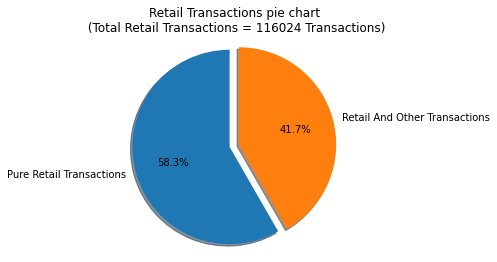

In [236]:
labels = ['Pure Retail Transactions' , 'Retail And Other Transactions']
retailOnlySize = (creditData_retail_noCash.shape[0]/creditData_retail.shape[0]*100)
sizes =[ retailOnlySize , 100- retailOnlySize ]
explode=[0.1 , 0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Retail Transactions pie chart\n (Total Retail Transactions = 116024 Transactions)')
plt.show()

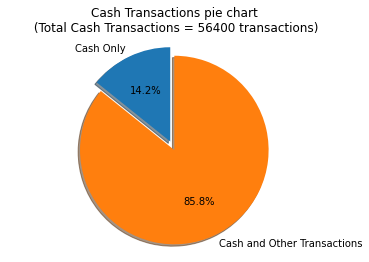

In [237]:
labels = ['Cash Only' , 'Cash and Other Transactions']
cashOnlySize = (creditData_cash_noRetail.shape[0]/creditData_cash.shape[0]*100)
sizes =[ cashOnlySize , 100- cashOnlySize ]
explode=[0.1 , 0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cash Transactions pie chart\n (Total Cash Transactions = 56400 transactions)')
plt.show()

## IQR Analysis and Segmentation based on Transaction value score 

In [238]:
creditData_final['Transaction_value_score_normalized'].describe()

count    1.439e+05
mean     2.730e-03
std      6.020e-03
min      0.000e+00
25%      5.707e-04
50%      1.349e-03
75%      2.949e-03
max      1.000e+00
Name: Transaction_value_score_normalized, dtype: float64

Based on the IQR analysis, we can have the following customer segments:

- low Profitable customers -> 0 to 5.707e-04
- slightly profitable Customers -> 5.707e-04 to 1.349e-03
- Moderately Profitable Customers ->  1.349e-03 to 2.949e-03
- High Profitable Customers -> 2.949e-03 to 1

In [239]:
creditData_lowProfit = creditData_final[(creditData_final['Transaction_value_score_normalized'] >= 0) & (creditData_final['Transaction_value_score_normalized'] <=  5.707e-04)]
creditData_slightProfit = creditData_final[(creditData_final['Transaction_value_score_normalized'] > 5.707e-04) & (creditData_final['Transaction_value_score_normalized'] <=  1.349e-03)]
creditData_moderateProfit = creditData_final[(creditData_final['Transaction_value_score_normalized'] >  1.349e-03) & (creditData_final['Transaction_value_score_normalized'] <=  2.949e-03)]
creditData_highProfit = creditData_final[(creditData_final['Transaction_value_score_normalized'] > 2.949e-03) & (creditData_final['Transaction_value_score_normalized'] <= 1)]

In [240]:
print(creditData_lowProfit.shape)
print(creditData_slightProfit.shape)
print(creditData_moderateProfit.shape)
print(creditData_highProfit.shape)

(35982, 531)
(35986, 531)
(35973, 531)
(35976, 531)


In [241]:
transactionDict = {'low profitable': creditData_lowProfit.shape[0] , 'slightly profitable':creditData_slightProfit.shape[0] , 'moderately profitable': creditData_moderateProfit.shape[0] , 'highly profitable':creditData_highProfit.shape[0]}

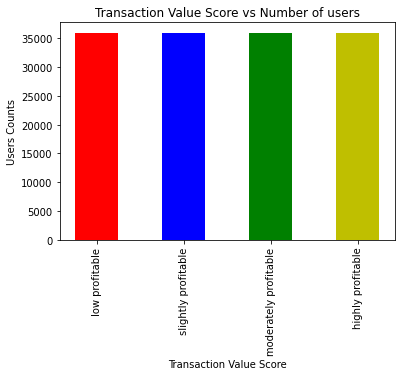

In [242]:
names = list(transactionDict.keys())
values = list(transactionDict.values())

plt.bar(range(len(transactionDict)), values, tick_label=names , color=['r' , 'b' ,'g' , 'y'] , align='center', width=0.5)
plt.xticks(rotation=90)
plt.title('Transaction Value Score vs Number of users')
plt.xlabel('Transaction Value Score')
plt.ylabel('Users Counts')

plt.show()

# Market Segmentation using Clustering 

## Activity Analysis Clustering 



> Based on No. of Distinct Months



In [243]:
X = pd.DataFrame([creditData_final['CARD_ID'] , creditData_final['NO_OF_Distinct_Months']])

In [244]:
X = X.T

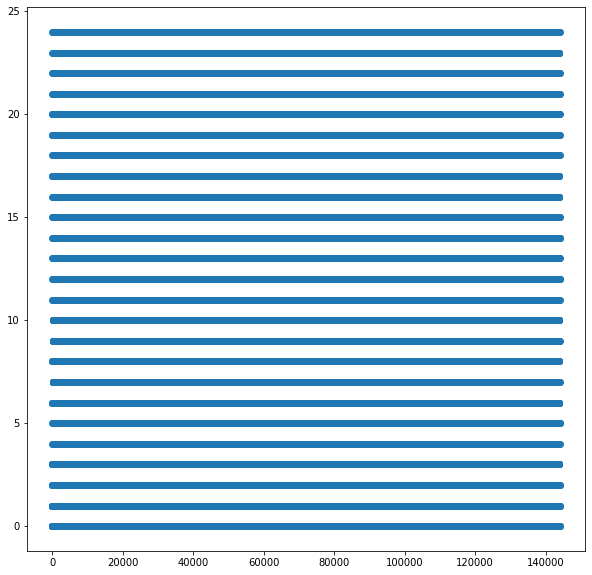

In [245]:
plt.figure(figsize=(10,10))
plt.scatter(X["CARD_ID"], X["NO_OF_Distinct_Months"])

In [246]:
X.head()

,CARD_ID,NO_OF_Distinct_Months
0,1.0,3.0
1,2.0,1.0
2,3.0,0.0
3,4.0,1.0
4,5.0,1.0


In [247]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)

In [248]:
X_std

array([[-1.7320307 , -0.62331687],
       [-1.73200664, -0.88203736],
       [-1.73198258, -1.0113976 ],
       ...,
       [ 1.73199858,  0.79964578],
       [ 1.73202264, -1.0113976 ],
       [ 1.7320467 , -0.75267711]])

In [249]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.09, min_samples=100).fit(X_std)

In [250]:
from sklearn import metrics

In [251]:
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 26
Estimated number of noise points: 23


In [252]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [253]:
clusters = pd.DataFrame(db.fit_predict(X_std))


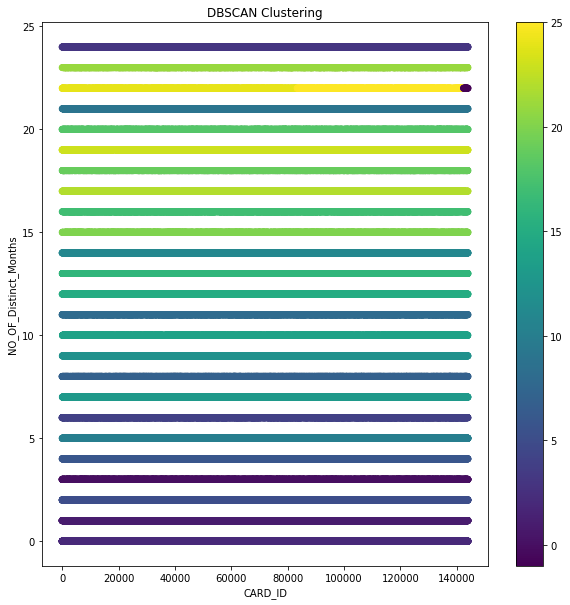

In [254]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["CARD_ID"], X["NO_OF_Distinct_Months"], c=X["Cluster"],cmap='viridis')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("CARD_ID")
ax.set_ylabel("NO_OF_Distinct_Months")
plt.colorbar(scatter)
plt.show()

In [255]:
X['Cluster'].value_counts()

 2     27890
 1     15412
 5     10389
 0      8060
 6      6583
 3      6179
 10     6068
 4      5238
 13     4799
 9      4653
 7      4489
 12     4145
 14     4011
 8      3696
 15     3435
 11     3371
 16     3331
 20     3099
 17     2973
 18     2939
 23     2806
 22     2796
 19     2770
 21     2628
 24     1230
 25      904
-1        23
Name: Cluster, dtype: int64

In [256]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++').fit(X_std)
labels = kmeans.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 6
Estimated number of noise points: 0


In [257]:
clusters = pd.DataFrame(kmeans.fit_predict(X))


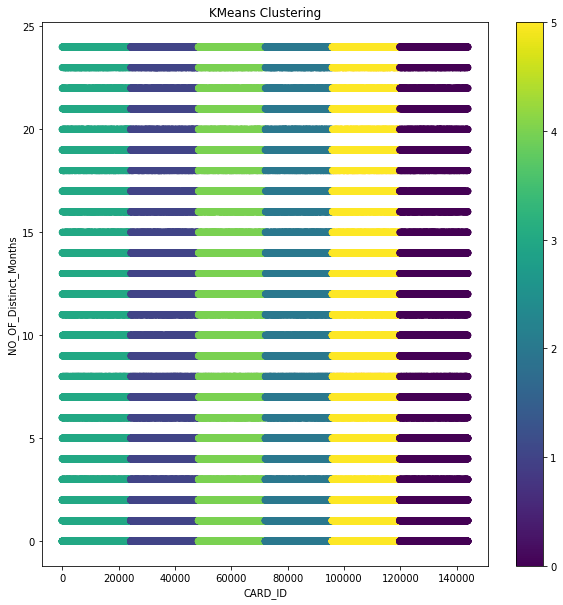

In [258]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["CARD_ID"], X["NO_OF_Distinct_Months"], c=X["Cluster"],cmap='viridis')
ax.set_title("KMeans Clustering")
ax.set_xlabel("CARD_ID")
ax.set_ylabel("NO_OF_Distinct_Months")
plt.colorbar(scatter)
plt.show()



> Based on Retail and Cash Transaction counts



In [259]:
X = pd.DataFrame([creditData_final['Total_Retail_Transactions_Count'] , creditData_final['Total_Cash_Transactions_Count']])

In [260]:
X = X.T

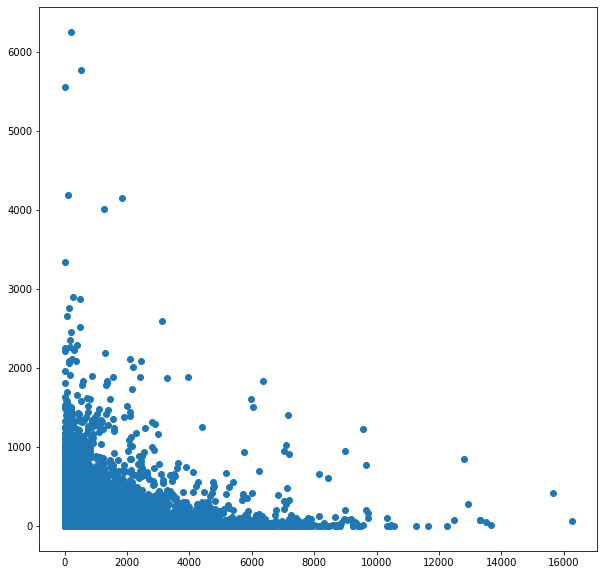

In [261]:
plt.figure(figsize=(10,10))
plt.scatter(X["Total_Retail_Transactions_Count"], X["Total_Cash_Transactions_Count"])

In [262]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)

In [263]:
X_std

array([[-0.3486308 , -0.20953732],
       [-0.4281595 , -0.29070379],
       [-0.44141429, -0.19939151],
       ...,
       [-0.16306382, -0.29070379],
       [-0.44141429, -0.29070379],
       [-0.3834246 , -0.29070379]])

In [264]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0, init='random').fit(X)
labels = kmeans.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 8
Estimated number of noise points: 0


In [265]:
clusters = pd.DataFrame(kmeans.fit_predict(X))


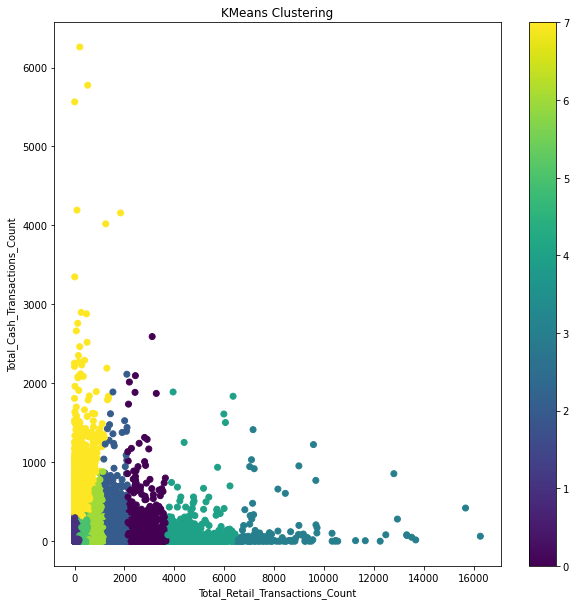

In [266]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["Total_Retail_Transactions_Count"], X["Total_Cash_Transactions_Count"], c=X["Cluster"],cmap='viridis')
ax.set_title("KMeans Clustering")
ax.set_xlabel("Total_Retail_Transactions_Count")
ax.set_ylabel("Total_Cash_Transactions_Count")
plt.colorbar(scatter)
plt.show()



> Based on Transaction Value Score



In [267]:
X = pd.DataFrame([creditData_final['CARD_ID'] , creditData_final['Transaction_value_score_normalized']])

In [268]:
X = X.T

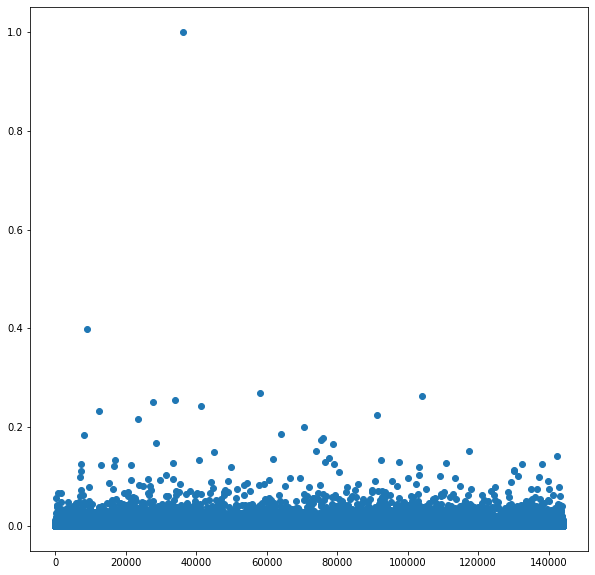

In [270]:
plt.figure(figsize=(10,10))
plt.scatter(X["CARD_ID"], X["Transaction_value_score_normalized"])

In [271]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)

In [272]:
X_std

array([[-1.7320307 , -0.347513  ],
       [-1.73200664,  0.02592556],
       [-1.73198258,  1.64528387],
       ...,
       [ 1.73199858, -0.1845317 ],
       [ 1.73202264, -0.43081653],
       [ 1.7320467 ,  0.18603442]])

In [273]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1, min_samples=100).fit(X)

In [274]:
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 143917


In [275]:
clusters = pd.DataFrame(db.fit_predict(X))


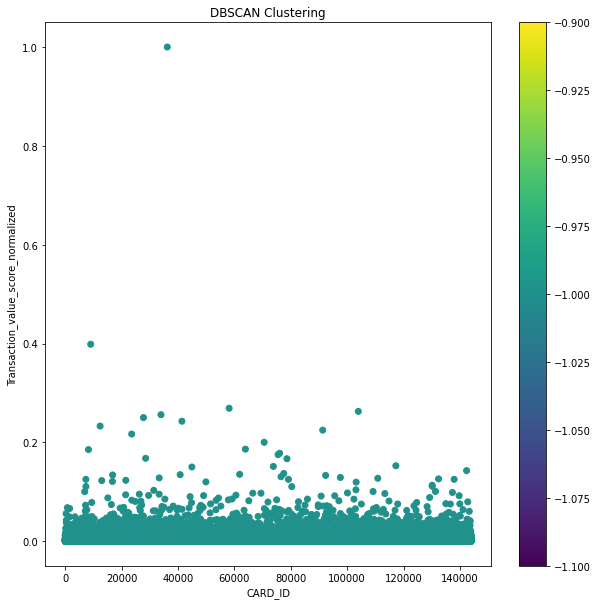

In [276]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["CARD_ID"], X["Transaction_value_score_normalized"], c=X["Cluster"],cmap='viridis')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("CARD_ID")
ax.set_ylabel("Transaction_value_score_normalized")
plt.colorbar(scatter)
plt.show()

In [277]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0, init='random').fit(X)
labels = kmeans.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 8
Estimated number of noise points: 0


In [278]:
clusters = pd.DataFrame(kmeans.fit_predict(X))


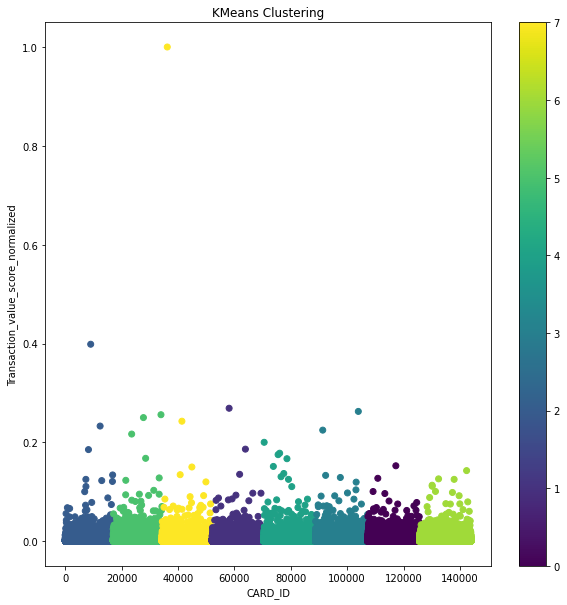

In [279]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["CARD_ID"], X["Transaction_value_score_normalized"], c=X["Cluster"],cmap='viridis')
ax.set_title("KMeans Clustering")
ax.set_xlabel("CARD_ID")
ax.set_ylabel("Transaction_value_score_normalized")
plt.colorbar(scatter)
plt.show()



> Based on Transaction Count and Amount



In [280]:
X = pd.DataFrame([creditData_final['Total_Transactions_Count'] , creditData_final['Total_Transactions_Amount']])

In [281]:
X = X.T

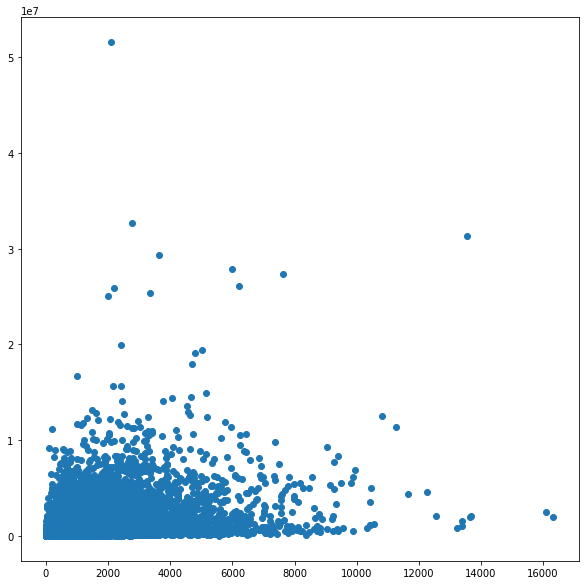

In [282]:
plt.figure(figsize=(10,10))
plt.scatter(X["Total_Transactions_Count"], X["Total_Transactions_Amount"])



> Based on Transaction Count and No. of Distinct Months



In [283]:
X = pd.DataFrame([ creditData_final['NO_OF_Distinct_Months'],creditData_final['Total_Retail_Transactions_Count'] ])

In [284]:
X = X.T
X

,NO_OF_Distinct_Months,Total_Retail_Transactions_Count
0,3.0,56.0
1,1.0,8.0
2,0.0,0.0
3,1.0,1.0
4,1.0,5.0
...,...,...
143912,5.0,126.0
143913,13.0,34.0
143914,14.0,168.0
143915,0.0,0.0


In [285]:
plt.figure(figsize=(10,10))
plt.scatter(x["NO_OF_Distinct_Months"],x["Total_Retail_Transactions_Count"])

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0, init='random').fit(X)
labels = kmeans.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


In [ ]:
clusters = pd.DataFrame(kmeans.fit_predict(X))


In [ ]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["NO_OF_Distinct_Months"], X["Total_Retail_Transactions_Count"], c=X["Cluster"],cmap='viridis')
ax.set_title("KMeans Clustering")
ax.set_xlabel("NO_OF_Distinct_Months")
ax.set_ylabel("Total_Retail_Transactions_Count")
plt.colorbar(scatter)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.09, min_samples=100).fit(X)

In [ ]:
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
clusters = pd.DataFrame(db.fit_predict(X))


In [ ]:
X["Cluster"] = clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X["CARD_ID"], X["Transaction_value_score_normalized"], c=X["Cluster"],cmap='viridis')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("CARD_ID")
ax.set_ylabel("Transaction_value_score_normalized")
plt.colorbar(scatter)
plt.show()